# Supplementary Figures - Upscaled CROP-seq KO150 screen

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/workflow/notebooks"

[1] "/home/sreichl/projects/bmdm-stim"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(Seurat, quietly=TRUE)

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key




# configs

In [4]:
# configs
data_path <- file.path('results','KO150')
results_path <- file.path('results','figures','supp_large_screen')

In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# load & prepare data

In [6]:
# loading Seurat object
KO150 <-readRDS(file = file.path(data_path,paste0("KO150_normalized_Seurat.rds")))
KO150

An object of class Seurat 
48804 features across 28303 samples within 5 assays 
Active assay: SCT (17131 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [7]:
# prepare metadata
KO150[['condition']] <- str_split_fixed(KO150$hto_demux, "_", 2)[,2]
KO150$KO_call[KO150$KO_call=='NonTargeting-'] <- 'NonTargeting'

In [8]:
unique(KO150$condition)

[1] "untreated" "LO28-6h"   "LO28-24h"

In [9]:
# colors for cond
cond_col <- setNames(object = hue_pal()(length(unique(KO150$condition))),nm = c('LO28-24h', 'LO28-6h', 'untreated'))
cond_col

LO28-24h   LO28-6h untreated 
"#F8766D" "#00BA38" "#619CFF"

In [10]:
cond_shapes

untreated   LO28-6h  LO28-24h 
       19        17        15

In [11]:
# loading PT141 Seurat object for KO calls
PT141 <-readRDS(file = file.path('results','PT141',paste0("PT141_normalized_Seurat.rds")))
PT141

An object of class Seurat 
45322 features across 9153 samples within 5 assays 
Active assay: SCT (14187 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [12]:
# colors for all perturbations
# KO_col_PT141 <- setNames(object = hue_pal()(length(unique(PT141$KO_call))),nm = unique(PT141$KO_call))
# KO_col_PT141["mNon-targeting"] <- "#D3D3D3"
KO_col_PT141 <- KO_col
names(KO_col_PT141) <- sub('.', '', names(KO_col_PT141))
names(KO_col_PT141) <- sub('Non-targeting', 'NonTargeting', names(KO_col_PT141))
names(KO_col_PT141)[names(KO_col_PT141) == 'cJun'] <- 'Jun'
# KO_col_PT141

In [13]:
# extend colors to all KO150 perturbations
KO_col <- hue_pal()(length(unique(KO150$KO_call))+4)
KO_col <- KO_col[1:length(unique(KO150$KO_call))]
names(KO_col) <- unique(KO150$KO_call)
# KO_col

In [14]:
# change colors for consistency with PT141 
KO_col_names <- names(KO_col[names(KO_col) %in% names(KO_col_PT141)])

for (col in KO_col[KO_col %in% KO_col_PT141]){
    KO_col[KO_col==col] <- KO_col[names(KO_col_PT141[KO_col_PT141==col])]
}

KO_col[KO_col_names] <- KO_col_PT141[KO_col_names]

# Unsupervised Analysis Cite-seq

In [15]:
# load data
AB_UMAP <- read.csv(file=file.path(data_path,'special_analysis/unsupervised_analysis/merged_NORMALIZED_AB/UMAP/','UMAP_correlation_100_0.1_2_data.csv'), row.names=1)
AB_UMAP$condition <- KO150$condition[rownames(AB_UMAP)]
AB_UMAP$KO <- KO150$KO_call[rownames(AB_UMAP)]
dim(AB_UMAP)
head(AB_UMAP)

[1] 28303     4

,UMAP_1,UMAP_2,condition,KO
,<dbl>,<dbl>,<chr>,<chr>
A1_AAACCTGAGAATCTCC-1,6.431755,4.006502,untreated,Chd7
A1_AAACCTGAGCGATGAC-1,5.995026,7.982929,untreated,Babam1
A1_AAACCTGAGTGCCAGA-1,2.520980,6.241717,untreated,Mov10
A1_AAACCTGAGTGGAGAA-1,5.928228,6.190071,untreated,Spi1
A1_AAACCTGAGTTTAGGA-1,5.989471,6.910888,untreated,Jmjd1c
A1_AAACCTGCACATTCGA-1,6.609170,4.400187,untreated,Ezh2


In [16]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

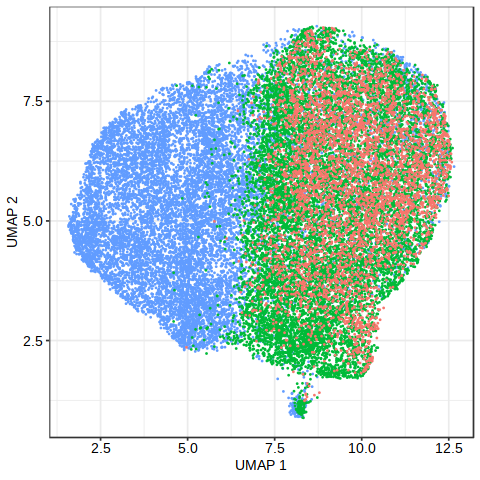

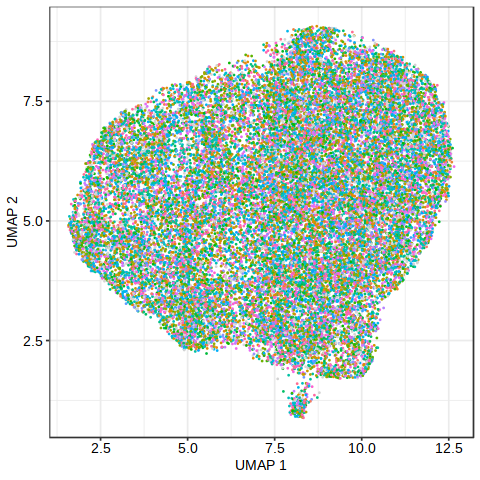

In [17]:
for (metadata in c('condition', 'KO')){
    # plot AB UMAP data
    AB_UMAP_p <- ggplot(AB_UMAP, aes(x=UMAP_1, y=UMAP_2)) +
    geom_point(aes_string(color=metadata), size=0.5, shape=19, stroke = 0) +
    {if(metadata=='KO') scale_color_manual(values=KO_col, drop=FALSE) } +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    macro_theme()+
    theme(legend.position="none")

    print(AB_UMAP_p)
    
    # save plot
    ggsave_new(filename=paste0("UMAP_AB_",metadata),
               results_path=results_path,
               plot=AB_UMAP_p,
               width=width,
               height=height
              )
}


# Unsupervised Analysis Cite-seq - mixscape

In [18]:
# load data
AB_UMAP <- read.csv(file=file.path(data_path,'special_analysis/unsupervised_analysis/merged_NORMALIZED_AB_MIXSCAPE/UMAP/','UMAP_correlation_100_0.1_2_data.csv'), row.names=1)
AB_UMAP$condition <- KO150$condition[rownames(AB_UMAP)]
AB_UMAP$KO <- KO150$KO_call[rownames(AB_UMAP)]
dim(AB_UMAP)
head(AB_UMAP)

[1] 6187    4

,UMAP_1,UMAP_2,condition,KO
,<dbl>,<dbl>,<chr>,<chr>
A1_AAACCTGCATGCTGGC-1,6.045652,6.239883,untreated,Smc1a
A1_AAACGGGAGAAACGCC-1,4.803910,6.876670,untreated,Ifnar1
A1_AAACGGGCACCTCGGA-1,8.008139,8.135799,untreated,Sfpq
A1_AAACGGGGTCCAAGTT-1,6.214426,3.911806,untreated,Tyk2
A1_AAACGGGGTCTGGAGA-1,4.781575,4.822929,untreated,NonTargeting
A1_AAACGGGGTGCTCTTC-1,7.179693,6.727920,untreated,NonTargeting


In [19]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

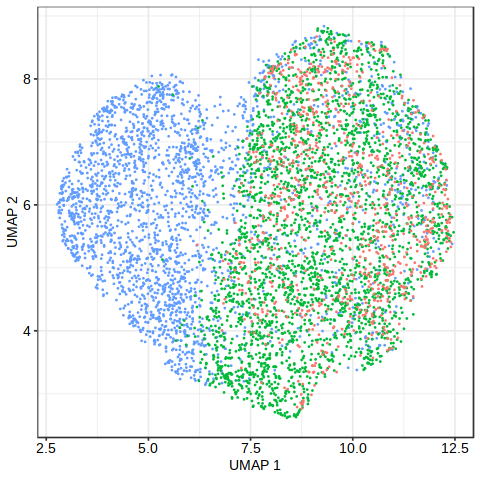

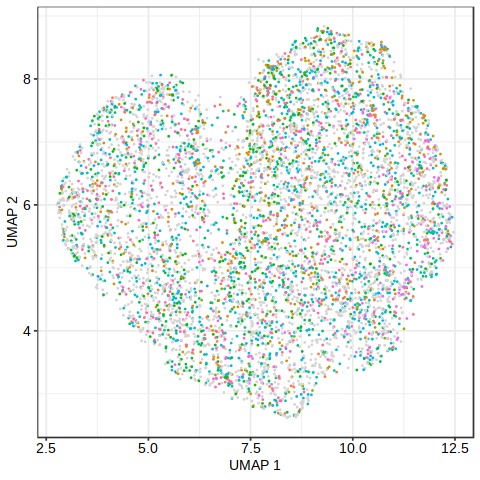

In [20]:
for (metadata in c('condition', 'KO')){
    # plot AB UMAP data
    AB_UMAP_p <- ggplot(AB_UMAP, aes(x=UMAP_1, y=UMAP_2)) +
    geom_point(aes_string(color=metadata), size=0.5, shape=19, stroke = 0) +
    {if(metadata=='KO') scale_color_manual(values=KO_col, drop=FALSE) } +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    macro_theme()+
    theme(legend.position="none")

    print(AB_UMAP_p)
    
    # save plot
    ggsave_new(filename=paste0("UMAP_AB_mixscape_",metadata),
               results_path=results_path,
               plot=AB_UMAP_p,
               width=width,
               height=height
              )
}


# Visualize Cell Cycle phase assignemnt in KO groups for each condition

In [21]:
bar_data <- data.frame(table(KO150[[c('Phase','KO_call','condition')]]))
head(bar_data)

,Phase,KO_call,condition,Freq
,<fct>,<fct>,<fct>,<int>
1,G1,Aak1,LO28-24h,35
2,G2M,Aak1,LO28-24h,5
3,S,Aak1,LO28-24h,2
4,G1,Aebp2,LO28-24h,35
5,G2M,Aebp2,LO28-24h,3
6,S,Aebp2,LO28-24h,4


In [22]:
cc_p <- list()

for (cond in c('untreated', 'LO28-6h', 'LO28-24h')){
    
    cc_p[[cond]] <- ggplot(bar_data[bar_data$condition==cond,], aes(fill=Phase, y=Freq, x=KO_call)) + 
        geom_bar(position="fill", stat="identity") +
        scale_y_continuous(expand = expansion(mult = c(0, 0))) +
        ggtitle(cond)+
    macro_theme() + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(), 
          panel.background = element_blank(), 
          axis.line = element_line(colour = "black"),
          axis.title.x=element_blank(),
          axis.title.y=element_blank())
}

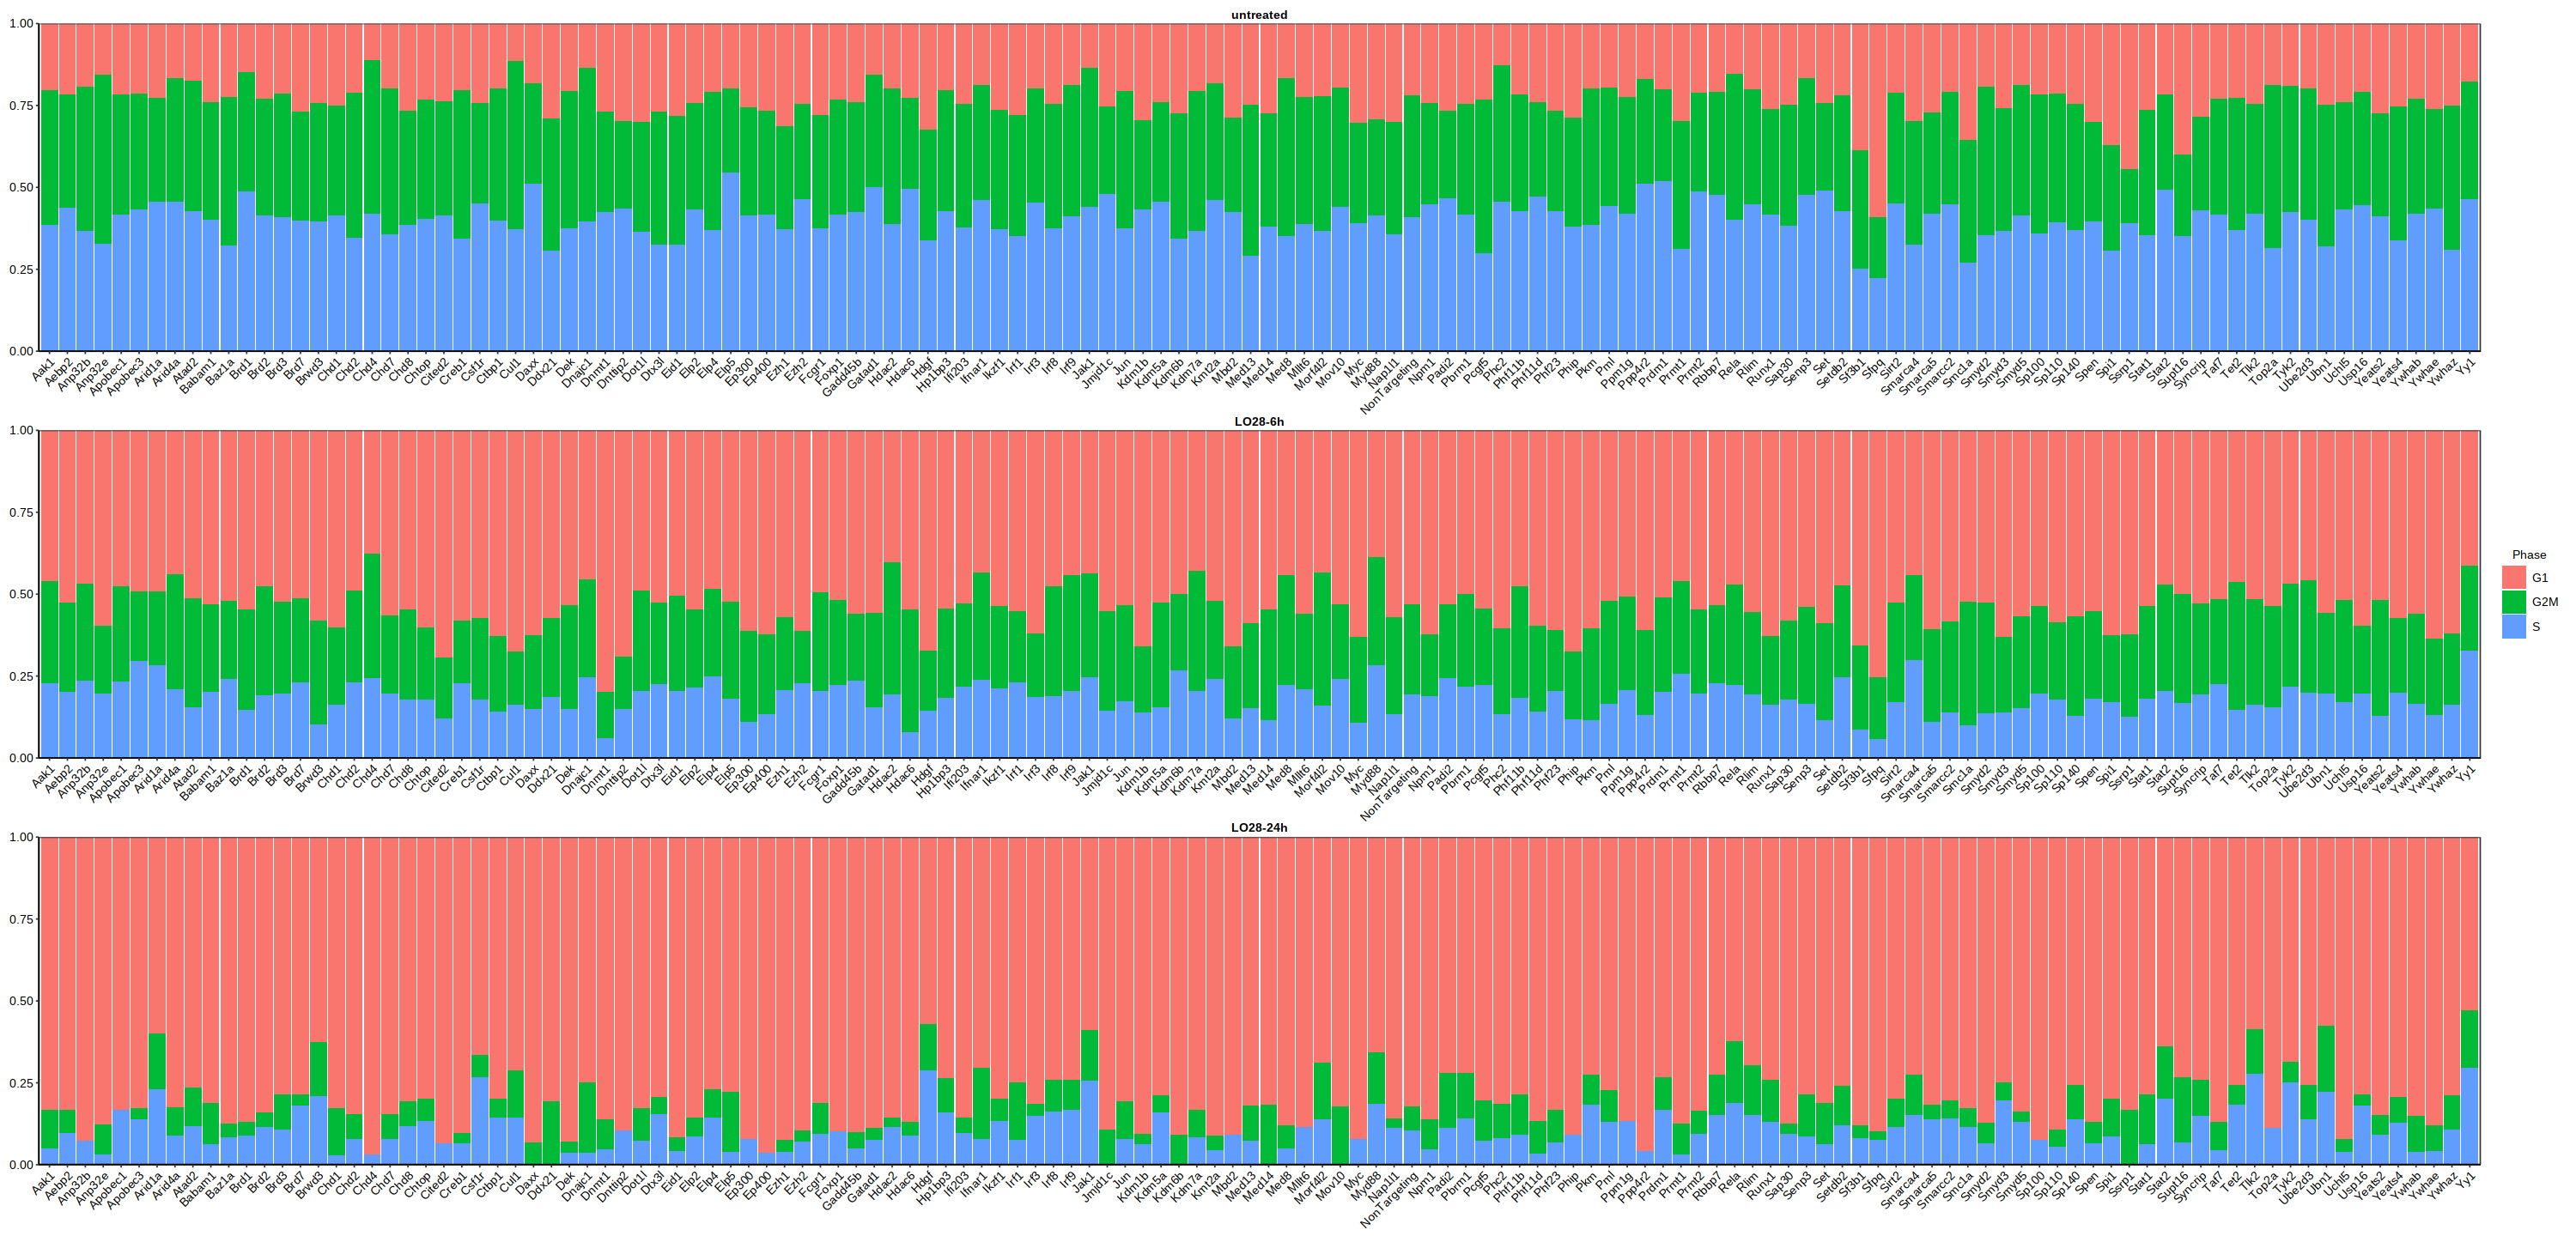

In [23]:
width <- 25
height <- 12
options(repr.plot.width=width, repr.plot.height=height)

wrap_plots(cc_p, guides='collect', ncol=1)

In [24]:
# save plot
ggsave_new(filename=paste0("CellCycle_Phase_panel"),
           results_path=results_path,
           plot=wrap_plots(cc_p, guides='collect', ncol=1),
           width=width,
           height=height
          )

# Mixscape result statistics per condition as barplots

In [25]:
KO_col_mixscape <- KO_col
# names(KO_col_mixscape) <- paste(names(KO_col_mixscape), 'KO')
names(KO_col_mixscape) <- sub('NonTargeting', 'NT', names(KO_col_mixscape))
# KO_col_mixscape

In [26]:
# load mixscape data
KO150_mixscape_data <- list()
for (cond in unique(KO150$condition)){
    KO150_mixscape_data[[cond]] <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO150_mixscape_Seurat.rds")))
}

In [27]:
# configs
grna_split_symbol <- '-'
NT_term <- "NonTargeting"

stats_p <- list()

for (cond in c('untreated', 'LO28-6h', 'LO28-24h')){
    data <- KO150_mixscape_data[[cond]]
    


    # Calculate percentage of KO cells for all target gene classes.
    stat_table <- table(data$mixscape_class.global, unlist(data[["guide_call"]]))
    df <- prop.table(stat_table,2)

    df2 <- reshape2::melt(df)
    df2$Var2 <- as.character(df2$Var2)
    test <- df2[which(df2$Var1 == "KO"),]
    test <- test[order(test$value, decreasing = T),]
    new.levels <- test$Var2
    df2$Var2 <- factor(df2$Var2, levels = new.levels )
    df2$Var1 <- factor(df2$Var1, levels = c(NT_term, "NP", "KO"))
    df2$gene <- sapply(as.character(df2$Var2), function(x) head(strsplit(x, split = grna_split_symbol)[[1]],1))
    df2$guide_number <- sapply(as.character(df2$Var2), function(x) tail(strsplit(x, split = grna_split_symbol)[[1]],1)) 
    # remove NT
    df3 <- df2[-c(which(df2$gene == NT_term)),]
    df3$Var1 <- factor(df3$Var1, levels = c("NP", "KO"))
    df3 <- df3[!is.na(df3$Var1),]

    p1 <- ggplot(df3, aes(x = guide_number, y = value*100, fill= Var1)) +
      geom_bar(stat= "identity") +
      theme_classic()+
      scale_fill_manual(values = c("grey79","coral1")) + 
      ylab("% of cells") +
      xlab("sgRNA")

    stats_p[[cond]] <- p1 + theme(axis.text.x = element_text(size = 10, hjust = 1), 
               axis.text.y = element_text(size = 10), 
               axis.title = element_text(size = 8), 
               strip.text = element_text(size=8, face = "bold")) + 
      facet_wrap(vars(gene),ncol = 10, scales = "free") +
      labs(fill = "mixscape class") +theme(legend.title = element_text(size = 12),
              legend.text = element_text(size = 12)) + ggtitle(gsub('-',' ',cond))
    
    width <- 15
    height <- 2*ceiling((dim(unique(data[["KO_call"]]))[1]-1)/10)
#     options(repr.plot.width=width, repr.plot.height=height)  
                               
    ggsave_new(filename = paste0("Mixscape_statistics_panel_",cond), 
               results_path=results_path, 
               plot=stats_p[[cond]], 
               width=width, 
               height=height)
                               
}

# Mixscape LDA UMAP plots per condition

In [28]:
# load data
KO150_mixscape_data <- list()
for (cond in unique(KO150$condition)){
    KO150_mixscape_data[[cond]] <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO150_mixscape_subset_Seurat.rds")))
}

In [29]:
KO150_mixscape_plots <- list()

for (cond in unique(KO150$condition)){

    sub <- KO150_mixscape_data[[cond]]
#     Idents(sub) <- "mixscape_class"
#     sub$mixscape_class <- as.factor(sub$mixscape_class)
    sub$mixscape_class_new <- as.factor(sub(' KO', '', sub$mixscape_class))
    Idents(sub) <- "mixscape_class_new"

    KO150_mixscape_plots[[cond]] <- DimPlot(object = sub,
                                            reduction = "ldaumap",
                                            repel = T,
                                            label.size = 4,
                                            label = T,
                                            cols = KO_col_mixscape,#col,
                                            pt.size=0.25,
                                            label.box=T) +
    scale_color_manual(values=KO_col_mixscape, drop=FALSE) +
    ylab("UMAP 2") +
    xlab("UMAP 1") +
    macro_theme()+
    ggtitle(sub('_', ' ', cond)) +
    theme(plot.title = element_text(hjust=0.5))+
    NoLegend()
    }

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



In [30]:
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

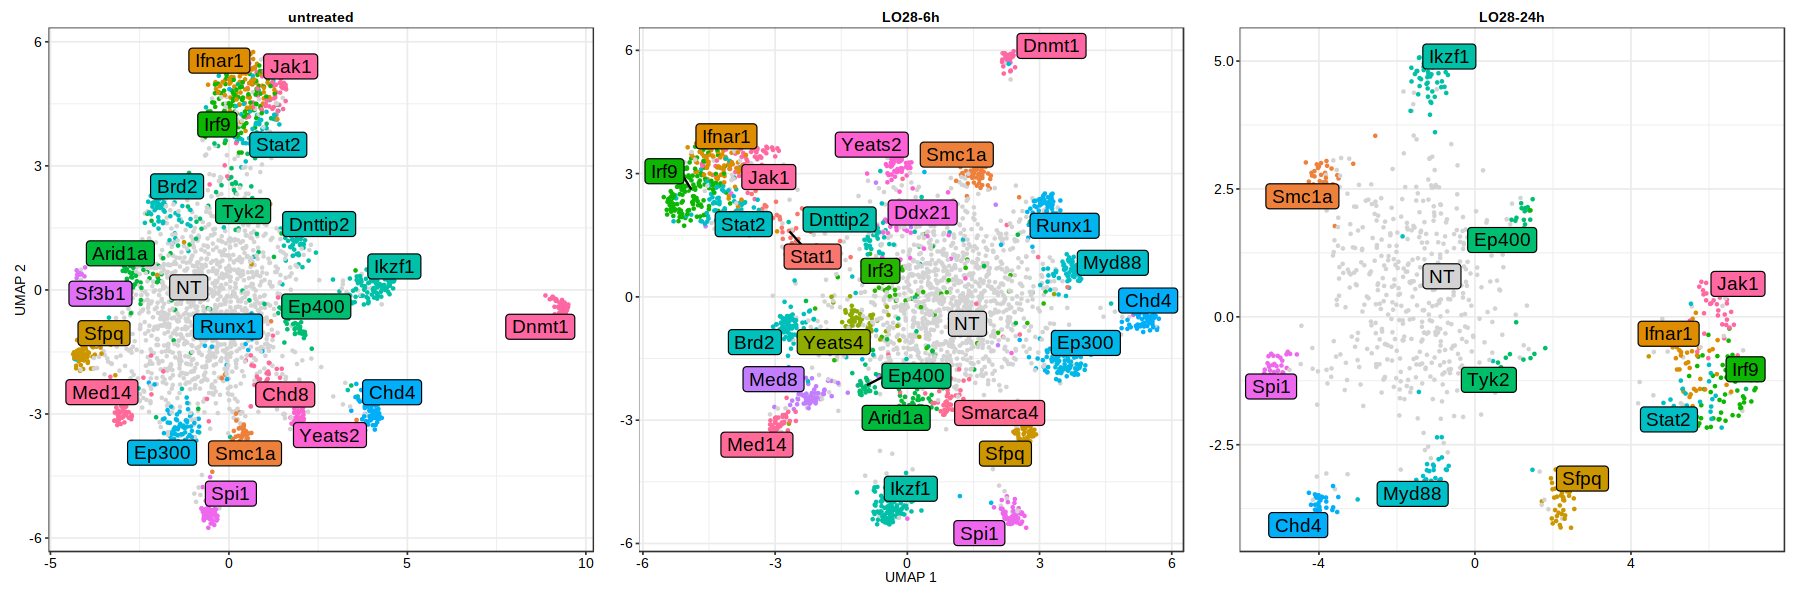

In [31]:
KO150_mixscape_plot <- ((KO150_mixscape_plots[['untreated']]+xlab("")) + 
                        (KO150_mixscape_plots[['LO28-6h']]+ylab("")) + 
                        (KO150_mixscape_plots[['LO28-24h']]+xlab("")+ylab("")))
KO150_mixscape_plot

In [32]:
# save plot
ggsave_new(filename="mixscape_LDA_UMAP_panel",
           results_path=results_path,
           plot=KO150_mixscape_plot,
           width=width,
           height=height
          )

# DEA statistics pre- and post-mixscape

Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning

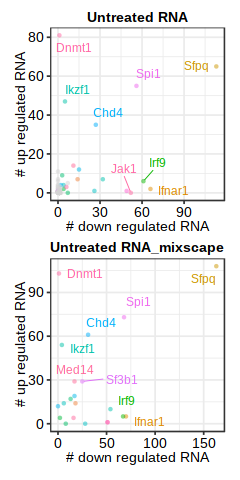

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 16 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning

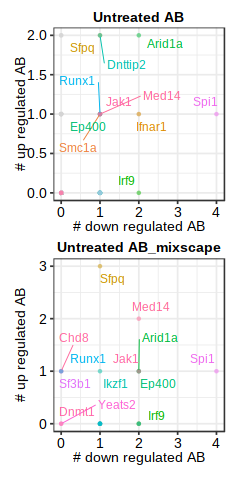

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 13 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warnin

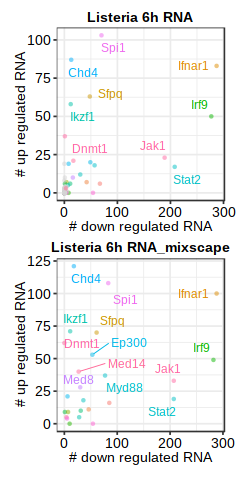

Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 11 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


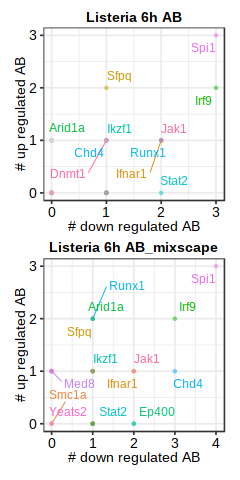

Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“Removed 16 rows containing missing values (geom_point).”
Warning message:
“Removed 16 rows containing missing values (geom_text_repel).”
Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


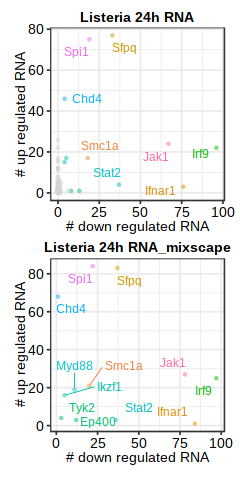

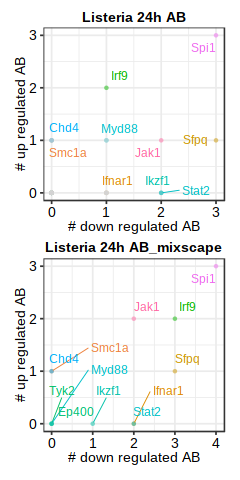

In [33]:
for (cond in c('untreated', "LO28-6h", "LO28-24h")){

    # Load mixscape class information & filter annotations
    annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
    annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
    annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
    dim(annot_mixscape)
    head(annot_mixscape)

    mixscape_KOs <- unique(annot_mixscape$mixscape_class)

    dea_plots <- list()

    for (mixscape in c("","_mixscape")){
        for (mode in c("RNA","AB")){
            tmp_name <- paste0(mode,mixscape)
            # load dea statistics
            dea_stats <- read.csv(file.path(data_path, paste0("DEA_condition",mixscape),paste0("KO150_DEA_",mode,"_summary_",cond,".csv")), row.names=1)
            # remove NonTargeting
            dea_stats <- dea_stats[rownames(dea_stats)!="NonTargeting",]
            # dim(dea_stats)
            # head(dea_stats)

            dea_stats$color <- lapply(rownames(dea_stats),FUN = function(x) if(x %in% mixscape_KOs) KO_col[x] else KO_col['NonTargeting']) #KO_col[rownames(dea_stats)]
            dea_stats$label <- lapply(rownames(dea_stats),FUN = function(x) if(x %in% mixscape_KOs) x else "") #rownames(dea_stats)

            dea_plots[[tmp_name]] <- ggplot(data = dea_stats, aes(x=down, y=up, label = label, color=color)) +
            geom_point(size=1, alpha=0.5, shape=19, stroke=0) + 
            geom_text_repel(size=2.5, segment.size=0.2) +
            ggtitle(paste(treatment_format(cond), tmp_name)) +
            xlab(paste0("# down regulated ",mode)) +    
            ylab(paste0("# up regulated ",mode)) +
            macro_theme()+
            theme(legend.position="none")#, axis.title=element_blank())
        }
    }

    width <- 2
    height <- 4
    options(repr.plot.width=width, repr.plot.height=height)

    for(assay in c('RNA','AB')){
        dea_plots_panel <- wrap_plots(dea_plots[grepl(assay, names(dea_plots))], ncol = 1)

        print(dea_plots_panel)

        # save plot
        ggsave_new(filename=paste0(paste0("DEA_stats_",cond,"_",assay)),
               results_path=results_path,
               plot=dea_plots_panel,
               width=width,
               height=height
              )
    }
}

# Cross prediction graph for untreated and Listeria 24h

In [34]:
# configs
# cond <- "LO28-24h" #'untreated'
clf_label <- 'LR'
conn_label <- 'prob'
directed <- TRUE

In [35]:
for (cond in c('untreated', "LO28-24h")){
    # Load adjacency matrix
    conn <- read.csv(file=file.path(data_path,'KO_classifier', cond, paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
    colnames(conn)<-gsub('.KO','',colnames(conn))
    rownames(conn)<-gsub(' KO','',rownames(conn))
    dim(conn)
    # conn

    # Load mixscape class information & filter annotations
    annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
    annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
    annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
    dim(annot_mixscape)
    head(annot_mixscape)

    # calculate class sizes to indicate as symbol size
    class_sizes <- as.numeric((table(annot_mixscape$mixscape_class)[colnames(conn)]))

    # load previous best layout coordinates
    coordinates <- as.matrix(read.csv(file.path("results/KO150/KO_classifier",cond,'layoutCoordinates.csv'), row.names=1))
    dim(coordinates)
    head(coordinates)

    # make cross prediction graph plot

    # set colors & shapes
    node_KO <- rownames(conn)
    node_cond <- rep(cond, times = dim(conn)[1])
    node_colors <- KO_col[node_KO]
    node_shape <- cond_shapes[node_cond]
    border_color <- cond_colors[node_cond]
    stroke_size <- 1.5
    point_size <- 5

    cut_off <- 0.1

    # data
    adjacencyMatrix <- as.matrix(conn)
    # parameters
    curved=FALSE

    adjacencyMatrix[adjacencyMatrix<cut_off] <- 0

    # plot graph

    # Empty ggplot2 theme
    new_theme_empty <- theme_bw()
    new_theme_empty$line <- element_blank()
    new_theme_empty$rect <- element_blank()
    new_theme_empty$strip.text <- element_blank()
    new_theme_empty$axis.text <- element_blank()
    new_theme_empty$plot.title <- element_blank()
    new_theme_empty$axis.title <- element_blank()
    new_theme_empty$plot.margin <- structure(c(0, 0, 0, 0), unit = "lines",
                                             valid.unit = 3L, class = "unit")

    if (exists("coordinates")){
        layoutCoordinates <- coordinates
    } else{
        layoutCoordinates <- gplot(adjacencyMatrix, mode = "fruchtermanreingold")  # Get graph layout coordinates
    }


    adjacencyList <- melt(adjacencyMatrix)  # Convert to list of ties only
    adjacencyList <- adjacencyList[adjacencyList$value > cut_off, ] # prune weak edges

    # Function to generate paths between each connected node
    edgeMaker <- function(whichRow, len = 100, curved = TRUE){
        fromC <- layoutCoordinates[adjacencyList[whichRow, 1], ]  # Origin
        toC <- layoutCoordinates[adjacencyList[whichRow, 2], ]  # Terminus

        # Add curve:
        graphCenter <- colMeans(layoutCoordinates)  # Center of the overall graph
        bezierMid <- c(fromC[1], toC[2])  # A midpoint, for bended edges
        distance1 <- sum((graphCenter - bezierMid)^2)
        if(distance1 < sum((graphCenter - c(toC[1], fromC[2]))^2)){
        bezierMid <- c(toC[1], fromC[2])
        }  # To select the best Bezier midpoint
        bezierMid <- (fromC + toC + bezierMid) / 3  # Moderate the Bezier midpoint
        if(curved == FALSE){bezierMid <- (fromC + toC) / 2}  # Remove the curve

        edge <- data.frame(bezier(c(fromC[1], bezierMid[1], toC[1]),  # Generate
                                c(fromC[2], bezierMid[2], toC[2]),  # X & y
                                evaluation = len))  # Bezier path coordinates
        edge$Sequence <- 1:len  # For size and colour weighting in plot
        edge$Group <- paste(adjacencyList[whichRow, 1:2], collapse = ">")

        # add a vector 'Probability' that linearly interpolates between the weights of the current edge and its counterpart
        x <- c(1,len)
        y <- c(adjacencyMatrix[adjacencyList[whichRow,'Var1'],adjacencyList[whichRow,'Var2']],adjacencyMatrix[adjacencyList[whichRow,'Var2'],adjacencyList[whichRow,'Var1']])
        edge$Probability <- approx(x,y,xout=1:len)$y

      return(edge)
    }

    # Generate a (curved) edge path for each pair of connected nodes
    allEdges <- lapply(1:nrow(adjacencyList), edgeMaker, len = 500, curved = curved)
    allEdges <- do.call(rbind, allEdges)  # a fine-grained path ^, with bend ^

    zp1 <- ggplot(allEdges) 
    zp1 <- zp1 + geom_path(aes(x = x, y = y, group = Group,  # Edges with gradient
                               colour = Sequence, size = Probability))  # and taper

    zp1 <- zp1 + geom_point(data = data.frame(layoutCoordinates),  # Add nodes
    #                         aes(x = x, y = y),  pch = 21, size = point_size, fill = node_colors, colour = border_color, stroke = stroke_size) # fill & borders are informative
                            aes(x = x, y = y), shape=node_shape, size = sqrt(class_sizes), color = node_colors)#+scale_shape_manual(name = "condition", labels = names(cond_shapes),values = cond_shapes) # fill and shape are informative

    # zp1 <- zp1 + geom_text(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO),#rownames(adjacencyMatrix)),
    #                        hjust=0.5, vjust=-1)

    zp1 <- zp1 + geom_label(data = data.frame(layoutCoordinates), aes(x = x, y = y, label=node_KO), fill=node_colors,#rownames(adjacencyMatrix)),
                           hjust=0.5, vjust=-0.5)

    zp1 <- zp1 + scale_colour_gradient(low = gray(0), high = gray(0), guide = "none") # Customize gradient

    zp1 <- zp1 + scale_size(range = c(1/10, point_size-1))#, guide = "none")  # Customize taper

    crosspred_p <- zp1 + new_theme_empty + theme(legend.position = c(0.5, 0.5))+ guides(size = guide_legend(title='Average\ncross-prediction\nprobability')) # Clean up plot

    width <- 7
    height <- 7
    options(repr.plot.width=width, repr.plot.height=height)

    crosspred_p

    # save plot
    ggsave_new(filename=paste0("crossprediction_graph_",cond),
               results_path=results_path,
               plot=crosspred_p,
               width=width,
               height=height
              )

    # save layout coordinates to make graph embeddings reproducible
    #write.csv(layoutCoordinates, file.path("results/KO150/KO_classifier",cond,'layoutCoordinates.csv'))
}

Warning message in melt(adjacencyMatrix):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(adjacencyMatrix). In the next version, this warning will become an error.”
Warning message in melt(adjacencyMatrix):
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(adjacencyMatrix). In the next version, this warning will become an error.”


# String DB violin plots for untreated and Listeria 24h

In [36]:
# cond <- "LO28-24h" #"untreated"

In [37]:
for (cond in c('untreated', "LO28-24h")){
    # load data
    union_df <- read.csv(file=file.path(data_path,'KO_classifier', cond,paste0("KO150_clf",clf_label,"_graph",conn_label,"_STRING_comparison.csv")), row.names=1)
    dim(union_df)
    head(union_df)

    #Perform the Mann-Whitney U test
    wt_re <- wilcox.test(x=union_df[(union_df$string>0) & (union_df$overlap),'string'], y=union_df[(union_df$string>0) & (!union_df$overlap),'string'])

    width <- 5
    height <- 5
    options(repr.plot.width=width, repr.plot.height=height)

    options(ggrepel.max.overlaps = 21)

    top_labels <- rownames(union_df[union_df$overlap==TRUE,])[order(union_df[union_df$overlap==TRUE,]$string, decreasing = TRUE)]#[1:11]
    top_labels <- paste(top_labels, collapse='\n')

    n_t <- sum(union_df$overlap)
    n_f <- sum(union_df$unique_string)

    violin_plot <- ggplot(union_df[union_df$string>0,], aes(x=overlap, y=string)) + 
    geom_violin(trim=TRUE)+
    geom_boxplot(width=0.1) +
    # geom_segment(aes(x=1.7, xend=TRUE, y=0.75, yend=1), size=0.2) + # make line connecting the top labels box with the top dots
    geom_dotplot(aes(group=crosspredict, fill=crosspredict), binaxis='y', stackdir='center', dotsize=0.5, alpha=0.75)+
    scale_fill_gradient2(midpoint=0, low="royalblue4", mid="white", high="firebrick2", space ="Lab") +
    annotate(x=FALSE, y = 0.1, label=paste0(n_f), geom="label", hjust=0.5, size=3, color = 'black')+
    annotate(x=TRUE, y = 0.1, label=paste0(n_t), geom="label", hjust=0.5, size=3, color = 'black')+
    ggtitle(paste0('Mann-Whitney U test p-value=',formatC(wt_re$p.value, format = "e", digits = 2))) +
    xlab("edge in STRING and cross-prediction graph") +    
    ylab("STRING interaction score") +
    # geom_label_repel(data = union_df[union_df$overlap==TRUE,], # label all overlapping edges/dots
    #                      aes(x = overlap, y = string, label=rownames(union_df[union_df$overlap==TRUE,])), 
    #                      size = 2.5,
    #                     min.segment.length = 0,
    #                     segment.size = 0.2, # line thickness
    # #                      xlim=if(grepl('untreated',axis[1])) c(NA,NA) else c(-4,12),
    #                  ylim = c(NA, Inf),
    #                      fill = alpha(c("white"),0.75),
    #                      seed = 42
    #                     ) +
    annotate(x=1.5, y = 0.57, label=top_labels, geom="label", hjust=0.5, size=3, color = 'black', fill = alpha(c("white"),0.9))+ # annotate not shown labels at the top
    macro_theme() +
    theme(legend.position = c(0.9, 0.5))

    violin_plot

    # save plot
    ggsave_new(filename=paste0("crossprediction_STRING_scores_",cond),
               results_path=results_path,
               plot=violin_plot,
               width=width,
               height=height
              )
}

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message in wilcox.test.default(x = union_df[(union_df$string > 0) & (union_df$overlap), :
“cannot compute exact p-value with ties”
`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



# Clustermap of DEA AB for untreated and Listeria 24h

In [38]:
library(tidyr)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




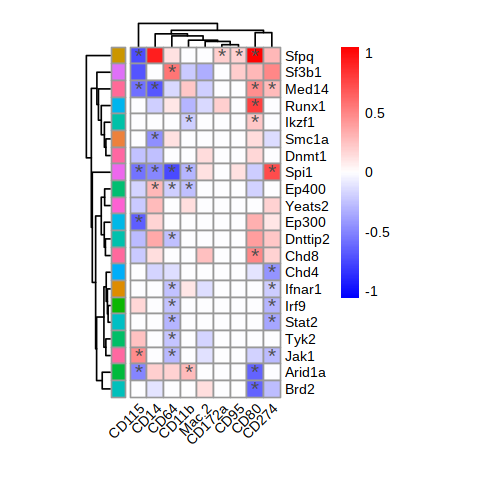

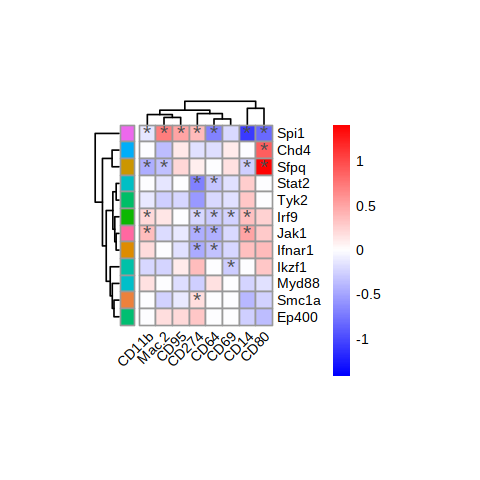

In [39]:
stat_sign <- 0.05
# cond <- 'LO28-24h'
for (cond in c('untreated', "LO28-24h")){
    KO150_mixscape <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO150_mixscape_subset_Seurat.rds")))

    # aggregate all DEA AB results
    dea_ab_results <- data.frame()

    for (KO_gene in unique(KO150_mixscape$KO_call)){ #unique(KO150$KO_call)){

        if ((KO_gene=="NonTargeting")) {#  | (sum(KO150$cond_KO==paste(cond,KO_gene,sep='+'))==0)) {
            next
        }

        tmp_dea_res <- read.csv(file=file.path(data_path, 'DEA_condition_mixscape', paste0('KO150_DEA_AB_',cond,'_',KO_gene,'.csv')), row.names=1)
        if (dim(tmp_dea_res)[1]==0){
            next
        }
        tmp_dea_res$ab <- rownames(tmp_dea_res)
        rownames(tmp_dea_res) <- NULL
        tmp_dea_res$group <- paste0(cond,'_',KO_gene)

        if(dim(dea_ab_results)[1]==0){
            dea_ab_results <- tmp_dea_res
        }else{
            dea_ab_results <- rbind(dea_ab_results, tmp_dea_res)
        }
    }

    dim(dea_ab_results)
    head(dea_ab_results)

    # make adjp dataframe for visualization of significance with *
    dea_ab_results_adjp <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "p_val_adj", values_fill = 1)
    dea_ab_results_adjp <- data.frame(dea_ab_results_adjp, row.names=dea_ab_results_adjp$group)
    dea_ab_results_adjp$group <- NULL
    mask <- dea_ab_results_adjp <= stat_sign
    dea_ab_results_adjp[mask] <- '*'
    dea_ab_results_adjp[!mask] <- ' '
    # dim(dea_ab_results_adjp)
    # head(dea_ab_results_adjp)

    # make LFC dataframe for visualization of effect size
    dea_ab_results_lfc <- pivot_wider(dea_ab_results,id_cols='group', names_from='ab',  values_from = "avg_log2FC", values_fill = 0)
    dea_ab_results_lfc <- data.frame(dea_ab_results_lfc, row.names=dea_ab_results_lfc$group)
    dea_ab_results_lfc$group <- NULL
    # dim(dea_ab_results_lfc)
    # head(dea_ab_results_lfc)

    width <- 4
    height <- 4
    options(repr.plot.width=width, repr.plot.height=height)

    tmp_idx <- grepl(cond, rownames(dea_ab_results_lfc), fixed = TRUE)
    tmp_lfc <- dea_ab_results_lfc[tmp_idx,]
    tmp_adjp <- dea_ab_results_adjp[tmp_idx,]

    rownames(tmp_lfc) <- gsub(pattern = paste0(cond,'_'),replacement = '', x = rownames(tmp_lfc))

    annot_ko <- data.frame(KO=rep("", nrow(tmp_lfc)))
    rownames(annot_ko) <- rownames(tmp_lfc)
    annot_ko$KO <- rownames(tmp_lfc)

    dim(annot_ko)
    head(annot_ko)

    # plot
    dea_ab_lfc_plot <- as.ggplot(pheatmap(tmp_lfc,
             display_numbers=as.matrix(tmp_adjp),
             cellwidth = 10,
             cellheight = 10,
             angle_col = "45",
             breaks=seq(-max(abs(dea_ab_results_lfc)), max(abs(dea_ab_results_lfc)), length.out=200),
             color=colorRampPalette(c("blue", "white", "red"))(200),
                                          show_rownames=TRUE,
                                    show_colnames=TRUE, 
                                    annotation_row = annot_ko,
                                    annotation_colors = list(KO=KO_col[rownames(tmp_lfc)]),
                                                annotation_legend = FALSE,
                                                annotation_names_row = FALSE,
    #                                 cutree_rows = 3, # split row clusters
    #                                 cutree_cols = 4, # split col clusters
                                    treeheight_row = 10,
                                    treeheight_col = 10,
                                    fontsize = 8,
                                          fontsize_number = 12,
                                    height=height,
                                    widht=width,
                                ))

    # save plot
    ggsave_new(filename=paste0("DEA_AB_LFC_",cond),
               results_path=results_path,
               plot=dea_ab_lfc_plot,
               width=width,
               height=height
              )
}

# Ep300-Sfpq overlapping enrichment in untreated

In [40]:
cond <- "untreated"
kos <- c("Ep300", "Sfpq")
db <- "GO_Biological_Process_2021"
top_n <- 5

In [41]:
# load and aggregate enrichment results for INTERSECTING TERMS
enrich_res <- data.frame()

for (KO_gene in kos){
    for (direction in c('up','down')){
    
        tmp_enrichments <- read.delim(file=file.path(data_path, 
                                                     "enrichment_analysis", 
                                                     "DEA_condition_mixscape",
                                                     paste0(cond,'_',KO_gene,'_',direction),
                                                     db,
                                                     paste0('Enrichr_',db,'_',cond,'_',KO_gene,'_',direction,'.csv')
                                                    ), 
                                      sep=',', header = TRUE)

        # remove unnecessary columns
        tmp_enrichments[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL

        # add annotation data
        tmp_enrichments$direction <- direction
        tmp_enrichments$condition <- cond
        tmp_enrichments$ko <- KO_gene

        if(nrow(enrich_res)==0){
            enrich_res <- tmp_enrichments
        }else{
            enrich_res <- rbind(enrich_res, tmp_enrichments)
        }
    }   
}

dim(enrich_res)
head(enrich_res)

[1] 2888    6

,Term,Adjusted.P.value,Odds.Ratio,direction,condition,ko
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,DNA replication (GO:0006260),0.16531290,7.798942,up,untreated,Ep300
2,DNA-dependent DNA replication (GO:0006261),0.18752504,6.438320,up,untreated,Ep300
3,Fc receptor signaling pathway (GO:0038093),0.16328294,8.110011,up,untreated,Ep300
4,Fc-epsilon receptor signaling pathway (GO:0038095),0.16400121,8.029956,up,untreated,Ep300
5,MAPK cascade (GO:0000165),0.27822893,3.593658,up,untreated,Ep300
6,MyD88-independent toll-like receptor signaling pathway (GO:0002756),0.09181789,27.435185,up,untreated,Ep300


In [42]:
# determine top_n by significance for each group
top_terms <- list()

# only keep top_n terms by significance
for (KO_gene in kos){
    for (direction in c('up','down')){
        
        tmp_enrichments <- enrich_res[(enrich_res$direction==direction) & (enrich_res$ko==KO_gene),]
        tmp_terms <- tmp_enrichments$Term[order(tmp_enrichments$Adjusted.P.value)[1:top_n]]
        top_terms <- unique(c(top_terms, tmp_terms))
    }
}


length(top_terms)
top_terms

[1] 19

[[1]]
[1] "antigen processing and presentation of exogenous peptide antigen via MHC class I (GO:0042590)"

[[2]]
[1] "antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-dependent (GO:0002479)"

[[3]]
[1] "cellular response to X-ray (GO:0071481)"

[[4]]
[1] "cellular response to type I interferon (GO:0071357)"

[[5]]
[1] "cobalamin transport (GO:0015889)"

[[6]]
[1] "neutrophil activation involved in immune response (GO:0002283)"

[[7]]
[1] "neutrophil degranulation (GO:0043312)"

[[8]]
[1] "neutrophil mediated immunity (GO:0002446)"

[[9]]
[1] "regulation of peptidase activity (GO:0052547)"

[[10]]
[1] "monocyte chemotaxis (GO:0002548)"

[[11]]
[1] "type I interferon signaling pathway (GO:0060337)"

[[12]]
[1] "cytokine-mediated signaling pathway (GO:0019221)"

[[13]]
[1] "defense response to symbiont (GO:0140546)"

[[14]]
[1] "defense response to virus (GO:0051607)"

[[15]]
[1] "nuclear export (GO:0051168)"

[[16]]
[1] "RNA transport (GO:0050658)"

[[17]]
[1] "positive regulation of cytoplasmic translation (GO:2000767)"

[[18]]
[1] "regulation of mRNA splicing, via spliceosome (GO:0048024)"

[[19]]
[1] "positive regulation of G2/M transition of mitotic cell cycle (GO:0010971)"

In [43]:
# filter for top terms
enrich_res <- enrich_res[enrich_res$Term %in% top_terms,]
dim(enrich_res)
head(enrich_res)

[1] 40  6

,Term,Adjusted.P.value,Odds.Ratio,direction,condition,ko
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
15,antigen processing and presentation of exogenous peptide antigen via MHC class I (GO:0042590),0.05738616,25.565744,up,untreated,Ep300
16,"antigen processing and presentation of exogenous peptide antigen via MHC class I, TAP-dependent (GO:0002479)",0.05738616,26.751131,up,untreated,Ep300
28,cellular response to X-ray (GO:0071481),0.05738616,164.888889,up,untreated,Ep300
39,cellular response to type I interferon (GO:0071357),0.05738616,37.849105,up,untreated,Ep300
42,cobalamin transport (GO:0015889),0.05738616,206.125000,up,untreated,Ep300
45,cytokine-mediated signaling pathway (GO:0019221),0.06531477,5.929945,up,untreated,Ep300


In [44]:
# prepare data for plotting

# order entries by adjusted p-value
enrich_res <- enrich_res[order(enrich_res$Adjusted.P.value),]

# remove stat. weaker duplicates within same comparison (ie KO)
enrich_res <- enrich_res[!duplicated(enrich_res[,c('Term','ko')]),]

# calculate & cap -log10(pvalue)
enrich_res$Adjusted.P.value <- -log10(enrich_res$Adjusted.P.value)
enrich_res$Adjusted.P.value[enrich_res$Adjusted.P.value>4] <- 4

# change sign of downregulated p-values
enrich_res <- as.data.table(enrich_res)

enrich_res[, Adjusted.P.value:=ifelse(direction=='up', Adjusted.P.value, -Adjusted.P.value)]

# remove GO BP numbers
enrich_res$Term <- remove_term_suffix(db=db, terms=enrich_res$Term)

In [45]:
width <- 7.25
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

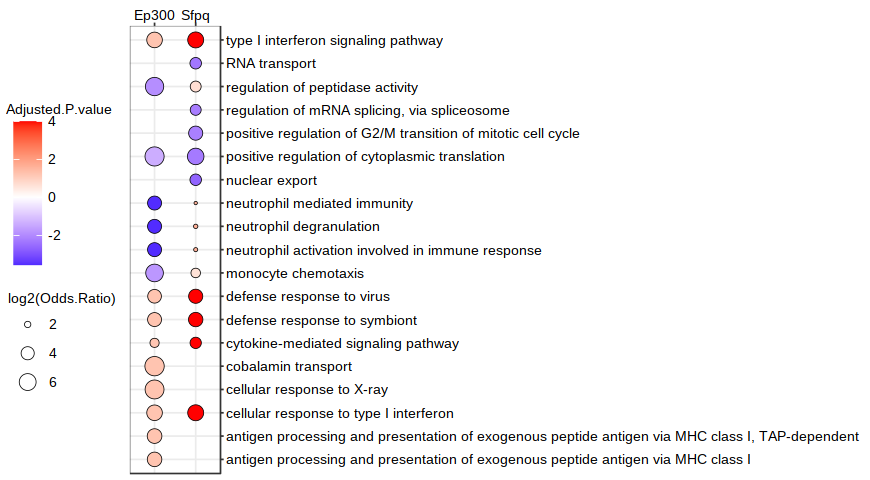

In [46]:
enr_p <- ggplot(enrich_res, aes(x=ko, y=Term, fill=Adjusted.P.value, size=log2(Odds.Ratio)))+ 
geom_point(shape=21, stroke=0.25) +
scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
scale_y_discrete(position = "right") + 
scale_x_discrete(position="top") +
scale_size_continuous(
            range = c(0.5,5), 
        breaks = c(2, 4, 6),
#         limits = c(0, 6) # removes data outside of the limit!
    ) + 
macro_theme() + 
theme(axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=0),
      axis.text.y = element_text(angle = 0, hjust = 1, vjust=0.5),
      axis.title.x=element_blank(),
      axis.title.y=element_blank(),
     legend.position="left",)
     

enr_p

In [47]:
# save plot
ggsave_new(filename=paste0("Ep300_Sfpq_enrichments_",cond),
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )

#  Enrichment analysis results of condition-wise DEA on mixscape results (all)

In [48]:
# config
data_path <- file.path('results','KO150', 'enrichment_analysis', 'DEA_condition_mixscape')
# top_n <- 1

dbs <- c("BioPlanet_2019",
         "GO_Biological_Process_2021")

In [49]:
# across all conditions
for(db in dbs){
    # load adj. p values & select most significant term per group
    tmp_adj <- read.delim(file=file.path(data_path,
                                      paste0('summary_',db,'_adjpvalues.csv')),
                                      sep=',', 
                                      header = TRUE,
                                      row.names = 1)

    # tmp_adj <- tmp_adj[,colSums(is.na(tmp_adj))<nrow(tmp_adj)]

    tmp_terms <- unlist(unique(sapply(tmp_adj, function(x) rownames(tmp_adj)[which.min(x)])))

    # load odds ratios and filter for selected terms
    tmp_or <- read.delim(file=file.path(data_path,
                                      paste0('summary_',db,'_oddsratio.csv')),
                                      sep=',', 
                                      header = TRUE,
                                      row.names = 1)
    tmp_enrichments <- tmp_or[tmp_terms, colSums(is.na(tmp_or))<nrow(tmp_or)]

    ## prepare data for plotting
    # fill NA and below 1 with 1
    tmp_enrichments[is.na(tmp_enrichments)] <- 1
    tmp_enrichments[tmp_enrichments<1] <- 1
    # fill Inf with max
    tmp_enrichments[tmp_enrichments==Inf] <- max(tmp_enrichments[tmp_enrichments!=Inf])
    print(log2(max(tmp_enrichments)))
    # add column for terms
    tmp_enrichments$terms <- rownames(tmp_enrichments)
    # melt data frame for plotting
    plot_enrichments <- reshape2::melt(tmp_enrichments, id.vars=c('terms'))
    # rename columns
    colnames(plot_enrichments) <- c('terms','group','odds_ratio')

    # add adjusted p-values to plot dataframe
    plot_enrichments$adjpvalues <- unlist(apply(plot_enrichments, 1, function(x) tmp_adj[x[1], x[2]]))
                                                
    # split group info in multiple columns
    plot_enrichments$group <- as.character(plot_enrichments$group)
    group_df <- t(data.frame(strsplit(plot_enrichments$group, split='_', fixed=TRUE)))
    rownames(group_df) <- rownames(plot_enrichments)
    colnames(group_df) <- c("condition","KO","direction")
    plot_enrichments <- cbind(plot_enrichments, group_df)
                                                
    # make new group columns
    plot_enrichments$group <- paste(plot_enrichments$condition, plot_enrichments$KO)

    # order entries by adjusted p-value
    plot_enrichments <- plot_enrichments[order(plot_enrichments$adjpvalues),]

    # remove stat. weaker duplicates within same comparison (ie KO)
    plot_enrichments <- plot_enrichments[!duplicated(plot_enrichments[,c('terms','group')]),]
                                                
    # beautify terms names
    plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

    # calculate & cap -log10(pvalue)
    plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
    plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4
    # set or <=1 to NA
    plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA
    # change sign of downregulated p-values
    plot_enrichments <- as.data.table(plot_enrichments)
    plot_enrichments[, adjpvalues:=ifelse(direction=='up', adjpvalues, -adjpvalues)]
                                   
    # perform hierarchical clustering on the log2 odds ratios of the terms
    enr_df <- reshape2::dcast(plot_enrichments, terms ~ group, value.var="odds_ratio")
    rownames(enr_df) <- enr_df$terms
    enr_df$terms <- NULL
    enr_df[is.na(enr_df)] <- 1
    hc_INT_rows <- hclust(dist(log2(enr_df)))
    hc_INT_cols <- hclust(dist(t(log2(enr_df))))
    enr_df <- enr_df[hc_INT_rows$order, hc_INT_cols$order]
    # ensure that the order of terms is kept after hierarchical clustering
    plot_enrichments$terms <- factor(plot_enrichments$terms, levels=rev(rownames(enr_df)))
    plot_enrichments$group <- factor(plot_enrichments$group, levels=rev(colnames(enr_df)))                                            

    head(plot_enrichments)

    width <- 14
    height <- 10
    options(repr.plot.width=width, repr.plot.height=height)

    # plot
    enr_p <- ggplot(plot_enrichments, aes(x=group, y=terms, fill=adjpvalues, size=log2(odds_ratio)))+ 
    # geom_point() +
    geom_point(shape=21, stroke=0.25) +
#     scale_fill_gradient(low="grey", high="red", breaks = c(1, 2, 3, 4), limits = c(0, 4)) +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
#     scale_y_discrete(label=addline_format) + 
    scale_size_continuous(
                range = c(0.1,3)
    ) +
    macro_theme() +
    labs(title = db) + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
          axis.title.x=element_blank(),
          axis.title.y=element_blank())
                                                
    # save enrichment plot
    ggsave_new(filename=paste0("DEA_condition_KO_enrichments_",db),
       results_path=results_path,
       plot=enr_p,
       width=width,
       height=height
      )
}

[1] 11.27214


Warning message:
“Removed 1957 rows containing missing values (geom_point).”
Warning message:
“Removed 1957 rows containing missing values (geom_point).”


[1] 11.8573


Warning message:
“Removed 2945 rows containing missing values (geom_point).”
Warning message:
“Removed 2945 rows containing missing values (geom_point).”


In [50]:
# for each condition
top_n <- 3
for (cond in make.names(unique(KO150$condition))){
    for(db in dbs){
        # load adj. p values & select most significant term per group
        tmp_adj <- read.delim(file=file.path(data_path,
                                          paste0('summary_',db,'_adjpvalues.csv')),
                                          sep=',', 
                                          header = TRUE,
                                          row.names = 1)

        # tmp_adj <- tmp_adj[,colSums(is.na(tmp_adj))<nrow(tmp_adj)]

        # filter for condition
        tmp_adj <- tmp_adj[,grepl(pattern = cond,x = colnames(tmp_adj))]

    #     tmp_terms <- unlist(unique(sapply(tmp_adj, function(x) rownames(tmp_adj)[which.min(x)])))
        tmp_terms <- (unique(c(sapply(tmp_adj, function(x) rownames(tmp_adj)[order(x, na.last=NA)][1:top_n]))))

        # load odds ratios and filter for selected terms
        tmp_or <- read.delim(file=file.path(data_path,
                                          paste0('summary_',db,'_oddsratio.csv')),
                                          sep=',', 
                                          header = TRUE,
                                          row.names = 1)

        # filter for condition
        tmp_or <- tmp_or[,grepl(pattern = cond,x = colnames(tmp_or))]

        tmp_enrichments <- tmp_or[tmp_terms, colSums(is.na(tmp_or))<nrow(tmp_or)]

        ## prepare data for plotting
        # fill NA and below 1 with 1
        tmp_enrichments[is.na(tmp_enrichments)] <- 1
        tmp_enrichments[tmp_enrichments<1] <- 1
        # fill Inf with max
        tmp_enrichments[tmp_enrichments==Inf] <- max(tmp_enrichments[tmp_enrichments!=Inf])
        print(log2(max(tmp_enrichments)))
        # add column for terms
        tmp_enrichments$terms <- rownames(tmp_enrichments)
        # melt data frame for plotting
        plot_enrichments <- reshape2::melt(tmp_enrichments, id.vars=c('terms'))
        # rename columns
        colnames(plot_enrichments) <- c('terms','group','odds_ratio')

        # add adjusted p-values to plot dataframe
        plot_enrichments$adjpvalues <- unlist(apply(plot_enrichments, 1, function(x) tmp_adj[x[1], x[2]]))

        # split group info in multiple columns
        plot_enrichments$group <- as.character(plot_enrichments$group)
        group_df <- t(data.frame(strsplit(plot_enrichments$group, split='_', fixed=TRUE)))
        rownames(group_df) <- rownames(plot_enrichments)
        colnames(group_df) <- c("condition","KO","direction")
        plot_enrichments <- cbind(plot_enrichments, group_df)

        # make new group columns
        plot_enrichments$group <- paste(plot_enrichments$condition, plot_enrichments$KO)

        # order entries by adjusted p-value
        plot_enrichments <- plot_enrichments[order(plot_enrichments$adjpvalues),]

        # remove stat. weaker duplicates within same comparison (ie KO)
        plot_enrichments <- plot_enrichments[!duplicated(plot_enrichments[,c('terms','group')]),]

        # beautify terms names
        plot_enrichments$terms <- remove_term_suffix(db=db, terms=plot_enrichments$terms)

        # calculate & cap -log10(pvalue)
        plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
        plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4
        # set or <=1 to NA
        plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA
        # change sign of downregulated p-values
        plot_enrichments <- as.data.table(plot_enrichments)
        plot_enrichments[, adjpvalues:=ifelse(direction=='up', adjpvalues, -adjpvalues)]

        # perform hierarchical clustering on the log2 odds ratios of the terms
        enr_df <- reshape2::dcast(plot_enrichments, terms ~ group, value.var="odds_ratio")
        rownames(enr_df) <- enr_df$terms
        enr_df$terms <- NULL
        enr_df[is.na(enr_df)] <- 1
        hc_INT_rows <- hclust(dist(log2(enr_df)))
        hc_INT_cols <- hclust(dist(t(log2(enr_df))))
        enr_df <- enr_df[hc_INT_rows$order, hc_INT_cols$order]
        # ensure that the order of terms is kept after hierarchical clustering
        plot_enrichments$terms <- factor(plot_enrichments$terms, levels=rev(rownames(enr_df)))
        plot_enrichments$group <- factor(plot_enrichments$group, levels=rev(colnames(enr_df)))                                            

        head(plot_enrichments)

        width <- 10
        height <- 10
        options(repr.plot.width=width, repr.plot.height=height)

        # plot
        enr_p <- ggplot(plot_enrichments, aes(x=group, y=terms, fill=adjpvalues, size=log2(odds_ratio)))+ 
        # geom_point() +
        geom_point(shape=21, stroke=0.25) +
    #     scale_fill_gradient(low="grey", high="red", breaks = c(1, 2, 3, 4), limits = c(0, 4)) +
        scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
    #     scale_y_discrete(label=addline_format) + 
        scale_size_continuous(
                    range = c(0.1,3)
        ) +
        macro_theme() +
        labs(title = db) + 
        theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust=1),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

        # save enrichment plot
        ggsave_new(filename=paste0("DEA_",cond,"_KO_enrichments_",db),
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )
    }
}

[1] 11.27253


Warning message:
“Removed 1007 rows containing missing values (geom_point).”
Warning message:
“Removed 1007 rows containing missing values (geom_point).”


[1] 12.8575


Warning message:
“Removed 1139 rows containing missing values (geom_point).”
Warning message:
“Removed 1139 rows containing missing values (geom_point).”


[1] 10.27234


Warning message:
“Removed 1198 rows containing missing values (geom_point).”
Warning message:
“Removed 1198 rows containing missing values (geom_point).”


[1] 9.54377


Warning message:
“Removed 1429 rows containing missing values (geom_point).”
Warning message:
“Removed 1429 rows containing missing values (geom_point).”


[1] 9.272144


Warning message:
“Removed 325 rows containing missing values (geom_point).”
Warning message:
“Removed 325 rows containing missing values (geom_point).”


[1] 10.53528


Warning message:
“Removed 452 rows containing missing values (geom_point).”
Warning message:
“Removed 452 rows containing missing values (geom_point).”


#  SF6

#  Enrichment analysis results of edges of cross-prediction graph across time

In [51]:
# config
data_path <- file.path('results','KO150', 'KO_classifier', 'all', 'interpretation')
# top_n <- 1

dbs <- c("BioPlanet_2019",
             "GO_Biological_Process_2021")

# modes <- c("stat", "top")
modes <- c("stat")

# db <- "GO_Biological_Process_2021"
# mode <- "stat"
# mode <- "top"

In [52]:
for (db in dbs){
    for (mode in modes){

        edge_enr <- read.delim(file=file.path(data_path,
                                  "enrichment_analysis",
                                  mode,
                                  paste0('summary_',db,'_adjpvalues.csv')),
                                  sep=',', 
                                  header = TRUE,
                                  row.names = 1)

        # remove all columns with not one single significant hit
        edge_enr <- edge_enr[,colSums(is.na(edge_enr))<nrow(edge_enr)]
        # set NA to 1 -> later log10(1)=0
        # edge_enr[is.na(edge_enr)] <- 1
        dim(edge_enr)
        # head(edge_enr)

        # identify most significant term per group
        enr_terms <- unique(sapply(edge_enr, function(x) rownames(edge_enr)[which.min(x)]))
        length(enr_terms)

        # subset enrichment results by identified terms
        edge_enr <- edge_enr[enr_terms,]
        dim(edge_enr)
        # head(edge_enr)
        write.csv(edge_enr, file=file.path(results_path, paste0("crossprediction_edge_enrichments_",db,"_",mode,"_pvalues.csv")), row.names = TRUE)

        # get odds ratios and subset
        edge_or <- read.delim(file=file.path(data_path,
                                  "enrichment_analysis",
                                  mode,
                                  paste0('summary_',db,'_oddsratio.csv')),
                                  sep=',', 
                                  header = TRUE,
                                  row.names = 1)
        edge_or <- edge_or[enr_terms, colnames(edge_enr)]
        # set NA to 1 -> later log10(1)=0
        # edge_or[is.na(edge_or)] <- 1

        dim(edge_or)
        # head(edge_or)
        write.csv(edge_or, file=file.path(results_path, paste0("crossprediction_edge_enrichments_",db,"_",mode,"_oddsratios.csv")), row.names = TRUE)

        # edge_or[,grepl('down', colnames(edge_or), fixed = TRUE)] <- -1 * edge_or[,grepl('down', colnames(edge_or), fixed = TRUE)]

        # order terms/rows by clustering, melt data, add adj p values
        # edge_or <- edge_or[hc_terms$order,]
        # add column for terms
        edge_or$terms <- rownames(edge_or) #enr_terms#[hc_terms$order]
        # melt data frame for plotting
        plot_enrichments <- melt(edge_or)
        # rename columns
        colnames(plot_enrichments) <- c('terms','group', 'odds_ratio')
        # add adjusted p-values to plot dataframe
        plot_enrichments$adjpvalues <- apply(plot_enrichments, 1, function(x) edge_enr[x[1], x[2]])

        if(grepl('GO', db, fixed = TRUE)){
            # remove "(GO:.......)" from terms & abbreviate if necessary
            plot_enrichments$terms <- gsub("\\(GO:.......)", "", plot_enrichments$terms)
        }
        if(grepl('WikiPathways', db, fixed = TRUE)){
            # remove WikiPathway IDs WP+numbers
            plot_enrichments$terms <- gsub("WP.*", "", plot_enrichments$terms)
        }

        # plot_enrichments$odds_ratio <- abs(plot_enrichments$odds_ratio)
        # plot_enrichments$odds_ratio[plot_enrichments$odds_ratio==1] <- NA

        # put direction in separate column
        plot_enrichments$direction[grepl('down', plot_enrichments$group, fixed = TRUE)] <- 'down'
        plot_enrichments$direction[grepl('up', plot_enrichments$group, fixed = TRUE)] <- 'up'

        # remove group suffixes (_down, _up)
        plot_enrichments$group <- str_replace(plot_enrichments$group, '_down', '')
        plot_enrichments$group <- str_replace(plot_enrichments$group, '_up', '')

        # order data frame by stat. power
        plot_enrichments <- plot_enrichments[order(plot_enrichments$adjpvalues),]
        # remove stat. weaker duplicates within same comparison (ie group)
        plot_enrichments <- plot_enrichments[!duplicated(plot_enrichments[,c('terms','group')]),]

        # calculate & cap -log10(pvalue)
        plot_enrichments$adjpvalues <- -log10(plot_enrichments$adjpvalues)
        plot_enrichments$adjpvalues[plot_enrichments$adjpvalues>4] <- 4

        # manage infinite values, by replacing with max in data
        plot_enrichments$odds_ratio[is.infinite(plot_enrichments$odds_ratio)] <- max(plot_enrichments$odds_ratio[is.finite(plot_enrichments$odds_ratio)])

        # make adj. p-values of down terms negative
        plot_enrichments$adjpvalues[plot_enrichments$direction=='down'] <- -1 * plot_enrichments$adjpvalues[plot_enrichments$direction=='down']

        # tranform data to get hierarchical clustering of rows and cols
        enrich_data_tmp <- data.table(plot_enrichments)

        # manage NA, transform with log2, 
        enrich_data_tmp[is.na(enrich_data_tmp$odds_ratio),'odds_ratio'] <- 1
        enrich_data_tmp[enrich_data_tmp$odds_ratio<1,'odds_ratio'] <- 1
        enrich_data_tmp$odds_ratio <- log2(enrich_data_tmp$odds_ratio)
        print(max(enrich_data_tmp$odds_ratio))
        # enrich_data_tmp[, odds_ratio:=ifelse(direction=='up', odds_ratio, -odds_ratio)]

        # unmelt data table
        enrich_data_df <- data.frame(dcast(
            data = enrich_data_tmp,
            formula = terms~group,
            value.var = "odds_ratio"
        ))
        terms_tmp <- enrich_data_df$terms
        rownames(enrich_data_df) <- terms_tmp
        enrich_data_df$terms <- NULL

        dim(enrich_data_df)
        # head(enrich_data_df)

        # hierarchically cluster terms and groups for plotting
        hc_terms <- hclust(dist(enrich_data_df))
        hc_groups <- hclust(dist(t(enrich_data_df)))

        # order terms and groups by hierarcical clustering
        plot_enrichments$terms <- factor(plot_enrichments$terms,levels=rownames(enrich_data_df)[hc_terms$order])
        plot_enrichments$group <- factor(plot_enrichments$group,levels=(colnames(enrich_data_df)[hc_groups$order]))
                                             
        plot_enrichments$odds_ratio[plot_enrichments$odds_ratio<=1] <- NA

        dim(plot_enrichments)
        head(plot_enrichments)

        width <- 12
        height <- 10

        options(repr.plot.width=width, repr.plot.height=height)

        enr_p <- ggplot(plot_enrichments, aes(x=terms, y=group, fill=adjpvalues, size=log2(odds_ratio)))+ 
        geom_point(shape=21, stroke=0.25) +
        # scale_colour_gradient2(low = "blue", mid = "white", high = "red",midpoint = 0)+
        scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
        scale_x_discrete(label=addline_format) + 
        scale_size_continuous(range = c(0.1,3)) +
        macro_theme() + 
        # scale_y_discrete(limits = rev(y_axis_labels)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.75),
              axis.title.x=element_blank(),
              axis.title.y=element_blank())

        enr_p

        # save enrichment plot
        ggsave_new(filename=paste0("crossprediction_edge_enrichments_",db,"_",mode),
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )
    }
}

Warning message in melt(edge_or):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(edge_or). In the next version, this warning will become an error.”
Using terms as id variables



[1] 11.39452


Warning message:
“Removed 2466 rows containing missing values (geom_point).”
Warning message:
“Removed 2466 rows containing missing values (geom_point).”
Warning message in melt(edge_or):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(edge_or). In the next version, this warning will become an error.”
Using terms as id variables



[1] 11.05012


Warning message:
“Removed 2812 rows containing missing values (geom_point).”
Warning message:
“Removed 2812 rows containing missing values (geom_point).”


# Plot adjacency matrix of the crossprediction graph as heatmap

In [53]:
# configs
cond <- 'all'
# classifier flag
clf_label <- 'LR'
# approach flag (counting or probabilities)
conn_label <- 'prob'
# directed or undirected (symmetric) graph
directed <- TRUE

## Load adjacency matrix

In [59]:
data_path <- file.path('results','KO150')

In [60]:
conn <- read.csv(file=file.path(data_path, 'KO_classifier', 'all', paste0("KO150_clf",clf_label,"_conn",conn_label,"Norm.csv")), row.names=1)
colnames(conn)<-gsub('.KO','',colnames(conn))
rownames(conn)<-gsub(' KO','',rownames(conn))
dim(conn)
conn

[1] 58 58

,LO28.24h.Chd4,LO28.24h.Ep400,LO28.24h.Ifnar1,LO28.24h.Ikzf1,LO28.24h.Irf9,LO28.24h.Jak1,LO28.24h.Myd88,LO28.24h.Sfpq,LO28.24h.Smc1a,LO28.24h.Spi1,⋯,untreated.Jak1,untreated.Med14,untreated.Runx1,untreated.Sf3b1,untreated.Sfpq,untreated.Smc1a,untreated.Spi1,untreated.Stat2,untreated.Tyk2,untreated.Yeats2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LO28-24h+Chd4,0.0000000000,0.0089739103,0.0072039933,0.0259591577,0.0169267457,0.0100494970,0.0219095210,0.0499805090,0.0425603472,0.0132924722,⋯,0.0008708462,0.0081101956,0.0088653022,0.0017104819,3.714806e-03,0.0034348010,0.0020874939,0.0010139953,0.0040839998,0.0031580799
LO28-24h+Ep400,0.0088609528,0.0000000000,0.0160354722,0.0555342898,0.0131302531,0.0470379484,0.0375018265,0.0060592256,0.0254255673,0.0152969626,⋯,0.0011115895,0.0015404166,0.0033052812,0.0065632012,3.341443e-03,0.0013634935,0.0033474318,0.0021925993,0.0029192400,0.0144762045
LO28-24h+Ifnar1,0.0017805465,0.0028169926,0.0000000000,0.0042596042,0.4605571271,0.1974118135,0.0032673130,0.0045182373,0.0027635765,0.0022785799,⋯,0.0128615371,0.0006465171,0.0001171158,0.0012575978,1.066486e-04,0.0005361280,0.0000986512,0.0107402903,0.0023043785,0.0002782323
LO28-24h+Ikzf1,0.0174286836,0.0174845960,0.0059193797,0.0000000000,0.0375308827,0.0157042458,0.0709464897,0.0158974300,0.0317629343,0.0224685871,⋯,0.0017325506,0.0046471393,0.0021643757,0.0026419774,4.279878e-03,0.0046440720,0.0028508458,0.0011848625,0.0020776944,0.0051826669
LO28-24h+Irf9,0.0026189127,0.0033577999,0.3859397491,0.0113159145,0.0000000000,0.1645422045,0.0060775102,0.0025790502,0.0039274585,0.0007915773,⋯,0.0311742579,0.0003874938,0.0003281283,0.0013607333,6.299277e-05,0.0004878817,0.0001787411,0.0132952219,0.0041832651,0.0008286832
LO28-24h+Jak1,0.0020244437,0.0135363428,0.3536896367,0.0042292332,0.3257720239,0.0000000000,0.0044068168,0.0013929314,0.0019847553,0.0011463017,⋯,0.0378398484,0.0002147972,0.0001048062,0.0008622843,3.511236e-05,0.0003960496,0.0005420760,0.0051668566,0.0028766879,0.0011904170
LO28-24h+Myd88,0.0298221701,0.0211276025,0.0107441198,0.1996485953,0.0329384241,0.0129887021,0.0000000000,0.0280340567,0.0808230103,0.0260752359,⋯,0.0002361228,0.0020041256,0.0042232026,0.0013849711,1.125848e-02,0.0011755329,0.0009944795,0.0011986218,0.0060549835,0.0075197037
LO28-24h+Sfpq,0.0719756351,0.0114049169,0.0165266999,0.0175390851,0.0239502086,0.0130811578,0.0199749194,0.0000000000,0.0396890029,0.0221052269,⋯,0.0010920733,0.0275556768,0.0025051363,0.0053231484,1.568399e-01,0.0013796578,0.0027025637,0.0013323615,0.0016559396,0.0045874039
LO28-24h+Smc1a,0.0385446540,0.0171576646,0.0062663933,0.0729930763,0.0051152787,0.0152440891,0.1054081700,0.0373809004,0.0000000000,0.0266977063,⋯,0.0004324909,0.0089806414,0.0008232787,0.0015313910,4.578082e-03,0.0566476065,0.0016674880,0.0002846626,0.0010398009,0.0025911697


## Load & filter annotations

In [61]:
# Load mixscape class information
annot_mixscape <- read.csv(file=file.path(data_path,'mixscape',cond, "KO150_mixscape_annotations.csv"), row.names=1)
annot_mixscape <- annot_mixscape[annot_mixscape$mixscape_class.global=='KO',]
annot_mixscape$mixscape_class <- gsub(' KO','', annot_mixscape$mixscape_class)
dim(annot_mixscape)
head(annot_mixscape)

[1] 3202    3

,mixscape_class,mixscape_class_p_ko,mixscape_class.global
,<chr>,<dbl>,<chr>
A1_AAACCTGCATGCTGGC-1,Smc1a,0.9950230,KO
A1_AAACGGGAGAAACGCC-1,Ifnar1,0.9960430,KO
A1_AAACGGGCACCTCGGA-1,Sfpq,1.0000000,KO
A1_AAACGGGGTCCAAGTT-1,Tyk2,0.9552953,KO
A1_AAAGATGGTAGCCTAT-1,Irf9,0.7050441,KO
A1_AAAGCAACAGTTAACC-1,Ep300,0.7731249,KO


In [62]:
if(cond=='all'){
    class_sizes <- rep(c(50),times=length(colnames(conn))) 
}else{
    class_sizes <- as.numeric((table(annot_mixscape$mixscape_class)[colnames(conn)]))
}


In [63]:
width <- 20
height <- 20
options(repr.plot.width=width, repr.plot.height=height)

In [64]:
# prepare annotation DFs for heatmap
annot_rows <- data.frame(t(data.frame(strsplit(rownames(conn), split='+', fixed=TRUE))))
rownames(annot_rows) <- rownames(conn)
colnames(annot_rows) <- c('Condition','KO')
annot_rows$Condition <- treatment_format(annot_rows$Condition)

annot_cols <- annot_rows
rownames(annot_cols) <- colnames(conn)

# ann_colors = list(cond = c("untreated"="green", "LO28-6h"="blue", "LO28-24h"="red"))

# colors
cond_col_new <- cond_col
names(cond_col_new) <- treatment_format(names(cond_col_new))
annotation_colors <- list(KO=KO_col[unique(annot_rows$KO)], Condition=cond_col_new[unique(annot_rows$Condition)])
annotation_colors

$KO
     Chd4     Ep400    Ifnar1     Ikzf1      Irf9      Jak1     Myd88      Sfpq 
"#00AEF9" "#00BE71" "#DE8C00" "#00C1A8" "#0CB702" "#FF68A1" "#00BFC9" "#CB9600" 
    Smc1a      Spi1     Stat2      Tyk2    Arid1a      Brd2     Ddx21     Dnmt1 
"#ED813C" "#ED68ED" "#00BFC4" "#00BE67" "#00BA3C" "#00C0BB" "#F664E2" "#FF67A2" 
  Dnttip2     Ep300      Irf3     Med14      Med8     Runx1   Smarca4     Stat1 
"#00C1AD" "#00B8E7" "#26B700" "#FF6A98" "#C17FFF" "#00B5EE" "#FF6C91" "#F8766D" 
   Yeats2    Yeats4      Chd8     Sf3b1 
"#FD61D2" "#8EAB00" "#FF699D" "#DF70F8" 

$Condition
Listeria 24h  Listeria 6h    Untreated 
   "#F8766D"    "#00BA38"    "#619CFF"

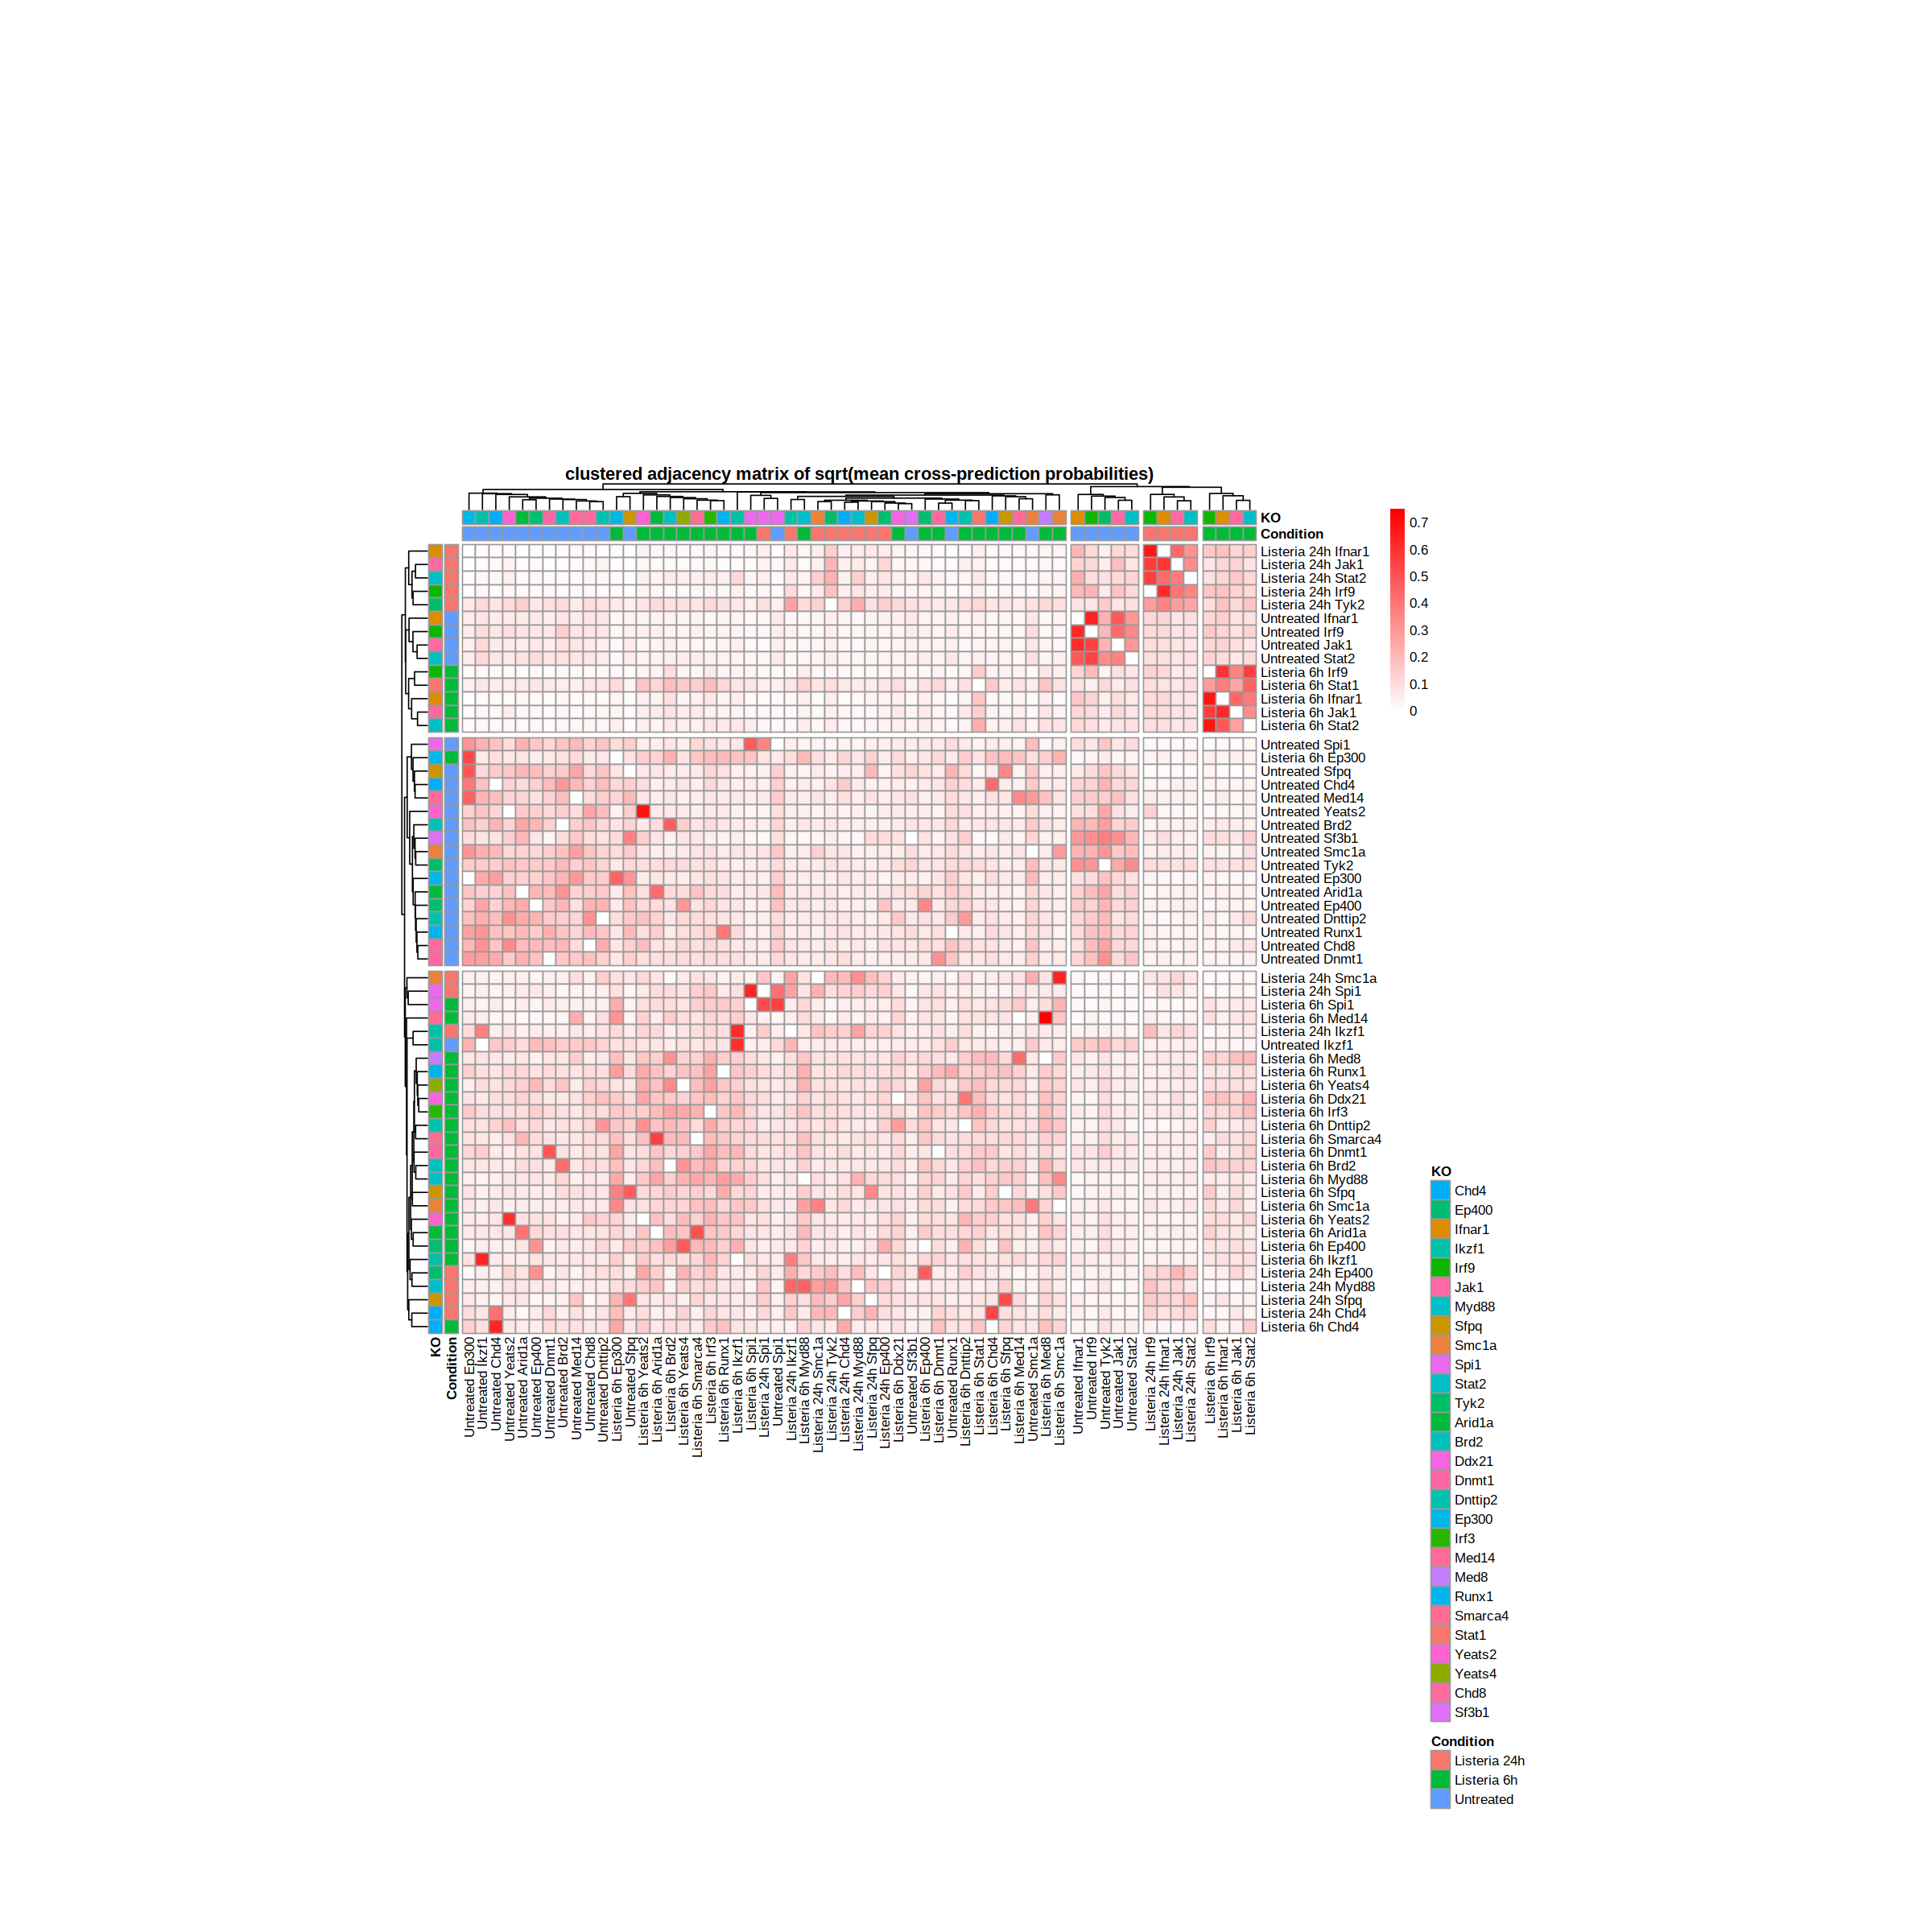

In [65]:
tmp_plot <- as.ggplot(pheatmap(sqrt(conn),
                               main = "clustered adjacency matrix of sqrt(mean cross-prediction probabilities)",
        cellwidth = 10,
             cellheight = 10,
             angle_col = "90",
             color=colorRampPalette(c("white", "red"))(200),
         annotation_col = annot_cols,
         annotation_row = annot_rows,
         treeheight_row = 15,
         treeheight_col = 15,
         cutree_rows = 3, # split row clusters
         cutree_cols = 4, # split col clusters 
         labels_col = treatment_format(colnames(conn)),
         labels_row = treatment_format(rownames(conn)),
         annotation_colors = annotation_colors,
                               height = height,
                               width = width
        ))

In [66]:
# save plot
ggsave_new(filename=paste0("KO150_clf",clf_label,"_graph",conn_label,"_sqrt_clustermap"),
           results_path=results_path,
           plot=tmp_plot,
           width=width,
           height=height
          )

# Plot enrichment heatmap of sc DEA results and INT temporal clusters

In [67]:
# load data
enr <- read.csv(file.path(data_path,'special_analysis','INT_comparison', 'GSEA_results.csv'))
dim(enr)
head(enr)

[1] 1154   10

,X,Gene_set,Term,Overlap,P.value,Adjusted.P.value,Odds.Ratio,Genes,Odds.Ratio1,degs_up_down
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,0,untreated_Spi1,C_albicans_cluster_1,2/77,0.1323414460,0.336869135,3.1557520,PLEK;PDE4B,3.1867701,1|1
2,1,untreated_Spi1,C_albicans_cluster_3,2/86,0.1578443867,0.368303569,2.8254989,WFDC17;LPL,2.8517651,0|2
3,2,untreated_Spi1,C_albicans_cluster_4,2/103,0.2080599966,0.387102706,2.3591544,RPL23;CTSS,2.3787106,1|1
4,3,untreated_Spi1,IFN_beta_cluster_1,11/411,0.0005988392,0.006916018,3.2517299,XDH;LY6A;CCL5;FBXO32;HPSE;TAPBPL;H2-Q6;H2-T22;H2-Q4;SLFN4;FCGR1,3.4422609,10*1
5,4,untreated_Spi1,IFN_beta_cluster_2,4/535,0.6460296817,0.705058615,0.9083847,TMEM176B;CYBB;RPL21;NHP2,0.9057098,2|2
6,5,untreated_Spi1,IFN_beta_cluster_3,11/672,0.0230819214,0.129258760,1.9887812,KLC4;PLD4;KANK3;PDE4B;CTSS;LCN2;TNFRSF9;CSF1R;SMDT1;DCSTAMP;SLC6A13,2.0724473,4|7


In [68]:
# odds ratios
enr_or <- reshape(data = enr[,c('Gene_set','Term','Odds.Ratio')], idvar = "Gene_set", timevar = "Term", direction = "wide")

rownames(enr_or) <- enr_or$Gene_set
enr_or$Gene_set <- NULL

colnames(enr_or) <- gsub(pattern = "Odds.Ratio.", replacement = "", x = colnames(enr_or), fixed = TRUE)

enr_or <- log2(enr_or)
enr_or[is.na(enr_or)] <- 0

dim(enr_or)
head(enr_or)

[1] 58 32

,C_albicans_cluster_1,C_albicans_cluster_3,C_albicans_cluster_4,IFN_beta_cluster_1,IFN_beta_cluster_2,IFN_beta_cluster_3,IFN_beta_cluster_4,IFN_gamma_cluster_1,IFN_gamma_cluster_2,IFN_gamma_cluster_3,⋯,LPS_cluster_1,LPS_cluster_2,LPS_cluster_3,LPS_cluster_4,LPS_cluster_5,LPS_cluster_6,C_albicans_cluster_6,IFN_gamma_cluster_5,C_albicans_cluster_2,C_albicans_cluster_5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
untreated_Spi1,1.657984,1.4985056,1.238270,1.7012074,-0.1386246848,0.99188459,-0.15471439,1.7818124,0.9323041,0.8876811,⋯,1.38871750,0.05687393,-0.4327816,0.5041083,1.53245297,1.5782567,0.0000000,0.000000,0.0000000,0
untreated_Dnmt1,0.000000,0.9376173,0.000000,1.0028155,-1.6995130505,-0.02843539,0.28439725,2.2209241,0.7864532,1.7418302,⋯,-0.49409896,1.17405747,0.5912925,0.3582575,-0.02843539,0.8247232,1.3194879,0.000000,0.0000000,0
untreated_Smc1a,0.000000,3.6380570,2.377821,1.9662897,0.0009266676,0.67200433,-0.01516303,0.0000000,0.0000000,1.4422699,⋯,0.20634075,0.00000000,1.7067697,1.6436597,0.00000000,1.7178080,0.0000000,3.572469,0.0000000,0
untreated_Arid1a,0.000000,0.0000000,0.000000,0.0000000,0.0000000000,0.00000000,2.39987446,0.0000000,3.9019304,3.8573074,⋯,0.00000000,2.28953469,0.0000000,0.0000000,0.00000000,2.1328455,0.0000000,0.000000,0.0000000,0
untreated_Sfpq,1.300349,1.8778360,1.617600,0.8841406,2.4423395823,0.29029500,0.22461602,0.2542523,1.8641755,-0.6398791,⋯,-0.06845337,0.49278787,2.0840523,-2.0234518,1.17481779,1.6356590,0.9377786,0.000000,0.9377786,0
untreated_Ifnar1,0.000000,2.9942008,2.149003,3.1525085,-0.2278920229,0.44318564,0.34098078,0.0000000,0.2580742,0.2134512,⋯,2.29945016,0.23064100,0.0000000,0.0000000,0.00000000,2.4889893,3.3760714,0.000000,0.0000000,0


In [69]:
# degs
enr_degs <- reshape(data = enr[,c('Gene_set','Term','degs_up_down')], idvar = "Gene_set", timevar = "Term", direction = "wide")

rownames(enr_degs) <- enr_degs$Gene_set
enr_degs$Gene_set <- NULL

enr_degs[is.na(enr_degs)] <- ''

dim(enr_degs)
head(enr_degs)

[1] 58 32

,degs_up_down.C_albicans_cluster_1,degs_up_down.C_albicans_cluster_3,degs_up_down.C_albicans_cluster_4,degs_up_down.IFN_beta_cluster_1,degs_up_down.IFN_beta_cluster_2,degs_up_down.IFN_beta_cluster_3,degs_up_down.IFN_beta_cluster_4,degs_up_down.IFN_gamma_cluster_1,degs_up_down.IFN_gamma_cluster_2,degs_up_down.IFN_gamma_cluster_3,⋯,degs_up_down.LPS_cluster_1,degs_up_down.LPS_cluster_2,degs_up_down.LPS_cluster_3,degs_up_down.LPS_cluster_4,degs_up_down.LPS_cluster_5,degs_up_down.LPS_cluster_6,degs_up_down.C_albicans_cluster_6,degs_up_down.IFN_gamma_cluster_5,degs_up_down.C_albicans_cluster_2,degs_up_down.C_albicans_cluster_5
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
untreated_Spi1,1|1,0|2,1|1,10*1,2|2,4|7,1|3,1|2,2|1,1|2,⋯,5*5,3|2,0|2,3|3,4|0,7*9,,,,
untreated_Dnmt1,,1|0,,5|0,0|1,4|0,4|0,3|0,2|0,3|1,⋯,2|0,7|1,3|0,4|0,1|0,7|0,1|0,,,
untreated_Smc1a,,0|2,0|1,2|1,0|1,0|2,0|1,,,0|1,⋯,0|1,,1|1,1|2,,2|2,,1|0,,
untreated_Arid1a,,,,,,,1|0,,1|0,1|0,⋯,,1|0,,,,1|0,,,,
untreated_Sfpq,3|0,4*1,2|3,11|1,1*45,9|4,10|0,2|0,10*1,2|0,⋯,5|2,2|11,1*21,1|1,6|0,27*5,2|0,,1|0,
untreated_Ifnar1,,0*3,0|2,0*16,2|0,0|4,0|3,,0|1,0|1,⋯,0*10,0|3,,,,0*16,0*3,,,


In [70]:
# prepare annotation DFs for heatmap
#rows
annotation_row <- t(data.frame(strsplit(rownames(enr_or),split='_',fixed=T)))
rownames(annotation_row) <- rownames(enr_or)
colnames(annotation_row) <- c('Condition','KO')
annotation_row <- as.data.frame(annotation_row)
annotation_row$Condition <- treatment_format(annotation_row$Condition)
dim(annotation_row)
head(annotation_row)
#columns
annotation_col = data.frame(treatment=gsub('_', ' ', gsub(pattern = "_cluster_.", replacement = "", colnames(enr_or))))
rownames(annotation_col) <- colnames(enr_or)
colnames(annotation_col) <- c('Treatment')
annotation_col$Treatment <- treatment_format(annotation_col$Treatment)
dim(annotation_col)
head(annotation_col)
# colors
treatment_colors_new <- treatment_colors
names(treatment_colors_new) <- treatment_format(names(treatment_colors_new))
cond_col_new <- cond_col
names(cond_col_new) <- treatment_format(names(cond_col_new))
annotation_colors <- list(KO=KO_col[unique(annotation_row$KO)], Condition=cond_col_new[unique(annotation_row$Condition)], Treatment = treatment_colors_new)
annotation_colors

[1] 58  2

,Condition,KO
,<chr>,<chr>
untreated_Spi1,Untreated,Spi1
untreated_Dnmt1,Untreated,Dnmt1
untreated_Smc1a,Untreated,Smc1a
untreated_Arid1a,Untreated,Arid1a
untreated_Sfpq,Untreated,Sfpq
untreated_Ifnar1,Untreated,Ifnar1


[1] 32  1

,Treatment
,<chr>
C_albicans_cluster_1,Candida
C_albicans_cluster_3,Candida
C_albicans_cluster_4,Candida
IFN_beta_cluster_1,IFN-b
IFN_beta_cluster_2,IFN-b
IFN_beta_cluster_3,IFN-b


$KO
     Spi1     Dnmt1     Smc1a    Arid1a      Sfpq    Ifnar1     Ep300      Tyk2 
"#ED68ED" "#FF67A2" "#ED813C" "#00BA3C" "#CB9600" "#DE8C00" "#00B8E7" "#00BE67" 
     Irf9     Ep400     Ikzf1   Dnttip2      Brd2     Stat2     Runx1      Chd4 
"#0CB702" "#00BE71" "#00C1A8" "#00C1AD" "#00C0BB" "#00BFC4" "#00B5EE" "#00AEF9" 
    Sf3b1    Yeats2      Jak1      Chd8     Med14    Yeats4      Irf3     Myd88 
"#DF70F8" "#FD61D2" "#FF68A1" "#FF699D" "#FF6A98" "#8EAB00" "#26B700" "#00BFC9" 
    Stat1     Ddx21      Med8   Smarca4 
"#F8766D" "#F664E2" "#C17FFF" "#FF6C91" 

$Condition
   Untreated  Listeria 6h Listeria 24h 
   "#619CFF"    "#00BA38"    "#F8766D" 

$Treatment
Untreated   Candida     IFN-b     IFN-g      LCMV  Listeria       LPS 
"#707070" "#0072B2" "#D55E00" "#E69F00" "#CC79A7" "#009E73" "#56B4E9"

In [71]:
width <- 8
height <- 10
options(repr.plot.width=width, repr.plot.height=height)

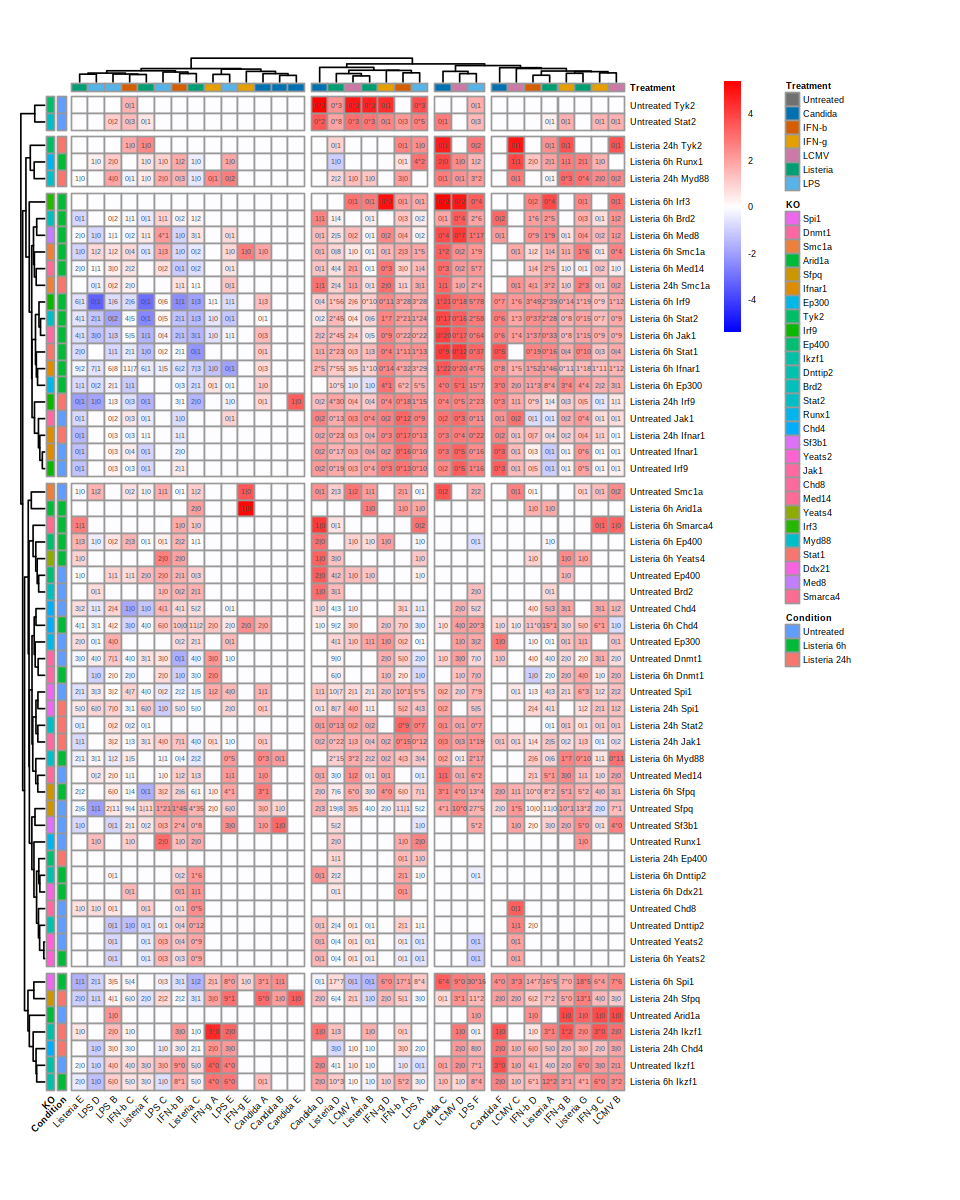

In [72]:
### plot heatmap
enr_p <- as.ggplot(pheatmap((enr_or),
         display_numbers = as.matrix(enr_degs),
         breaks=seq(-max(abs(enr_or)), max(abs(enr_or)), length.out=200),
         color=colorRampPalette(c("blue", "white", "red"))(200),
                            annotation_row = annotation_row,
                            annotation_col = annotation_col,
                            annotation_colors = annotation_colors,
#                             border_color = NA,
                            
         show_rownames=T,
         show_colnames=T, 
         labels_col = cluster_format2(colnames(enr_or)),
         labels_row = treatment_format(rownames(enr_or)),
         cutree_rows = 5, # split row clusters
         cutree_cols = 4, # split col clusters 
         treeheight_row = 10,
         treeheight_col = 10,
         cellwidth = 10,
         cellheight = 10,
         fontsize = 5,
         height=height,
         widht=width,
                            angle_col = 45,
        silent=TRUE
      ))
enr_p

In [73]:
# save plot
ggsave_new(filename=paste0("KO150_INT_GSEA_all"),
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )